# Lab 4:  Regularization

## Saturday, November 3rd 2018

#### David Sondak and Pavlos Protopapas

# Background
Lecture 3 introduced several types of regularization.  In today's lab, you will become more familiar with those regularization techniques and actually apply them to a problem.  The types of regularization that you will explore today are:
* Penalization
* Early stopping
* Dropout

There are many other types of regularization (as mentioned in lecture).  The three regularization techniques that you will explore today are very popular and used frequently in real applications.

We'll begin the story by building a neural network to learn a function from some noisy data.

# Warming Up
Today we'll try to fit the function $$f\left(x\right) = x\sin\left(x\right).$$

Using `keras`, build a fully-connected neural network to fit $f\left(x\right)$.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import models
from keras import layers
%matplotlib inline

Using TensorFlow backend.


First, we'll generate some synthetic data with some synthetic noise.

In [2]:
n_samples = 100 # set the number of samples to take for each toy dataset
test_size = 0.2 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: x * np.sin(x)

# Generate the truth function (without any noise)
X_true = np.linspace(0.0, 5.0, n_samples)
Y_true = f(X_true)

# Now sample the true function at some points
X = np.random.permutation(X_true) # choose some points from the function - this is our toy dataset 
Y = f(X)

Y = Y + np.random.normal(0.0, 1.0, len(Y)) # Add some noise from a random normal distribution

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Now we'll build a network.  We choose $5$ hidden layers and $100$ nodes per layer.

In [4]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for _ in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

In [5]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

Next we'll fit the model.  

Notice that we're specifying a *validation set*.  What this means is that `keras` will further split the training set into a training part and a validation part.  The neural network will only be trained on the *training* set.  Meanwhile, `keras` will report performance metrics on the *validation* set so we can get a sense of how well the model has been trained.  We will be using the validation set quite a bit in this lab.

Remember, we don't want to use the test set for anything relating to the training of our models.  By withholding the validation set, we can assess the model performance on the validation set.  Later, we can see how the model performs on data it has never seen before by using in on the test set.

In [6]:
# Fit the model
no_reg = model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 12ms/step - loss: 5.6882 - val_loss: 4.2976
Epoch 2/2500
64/64 [==============================] - 0s 58us/step - loss: 5.4559 - val_loss: 4.0915
Epoch 3/2500
64/64 [==============================] - 0s 55us/step - loss: 5.2525 - val_loss: 3.9141
Epoch 4/2500
64/64 [==============================] - 0s 64us/step - loss: 5.0797 - val_loss: 3.7370
Epoch 5/2500
64/64 [==============================] - 0s 114us/step - loss: 4.9095 - val_loss: 3.5784
Epoch 6/2500
64/64 [==============================] - 0s 61us/step - loss: 4.7597 - val_loss: 3.4278
Epoch 7/2500
64/64 [==============================] - 0s 1ms/step - loss: 4.6210 - val_loss: 3.3011
Epoch 8/2500
64/64 [==============================] - 0s 557us/step - loss: 4.5127 - val_loss: 3.2093
Epoch 9/2500
64/64 [==============================] - 0s 272us/step - loss: 4.4457 - val_loss: 3.1686
Epoch 10/2500
64/64 [========================

Epoch 81/2500
64/64 [==============================] - 0s 53us/step - loss: 1.0734 - val_loss: 1.3866
Epoch 82/2500
64/64 [==============================] - 0s 257us/step - loss: 1.0113 - val_loss: 1.1587
Epoch 83/2500
64/64 [==============================] - 0s 72us/step - loss: 1.0239 - val_loss: 1.3033
Epoch 84/2500
64/64 [==============================] - 0s 129us/step - loss: 0.9624 - val_loss: 1.5021
Epoch 85/2500
64/64 [==============================] - 0s 174us/step - loss: 0.9766 - val_loss: 1.2996
Epoch 86/2500
64/64 [==============================] - 0s 52us/step - loss: 0.9264 - val_loss: 1.2416
Epoch 87/2500
64/64 [==============================] - 0s 229us/step - loss: 0.9343 - val_loss: 1.4583
Epoch 88/2500
64/64 [==============================] - 0s 178us/step - loss: 0.9019 - val_loss: 1.4914
Epoch 89/2500
64/64 [==============================] - 0s 64us/step - loss: 0.8956 - val_loss: 1.2856
Epoch 90/2500
64/64 [==============================] - 0s 129us/step - loss: 

Epoch 161/2500
64/64 [==============================] - 0s 74us/step - loss: 0.7348 - val_loss: 1.1656
Epoch 162/2500
64/64 [==============================] - 0s 56us/step - loss: 0.7340 - val_loss: 1.2155
Epoch 163/2500
64/64 [==============================] - 0s 202us/step - loss: 0.7330 - val_loss: 1.1542
Epoch 164/2500
64/64 [==============================] - 0s 175us/step - loss: 0.7315 - val_loss: 1.1877
Epoch 165/2500
64/64 [==============================] - 0s 98us/step - loss: 0.7295 - val_loss: 1.1768
Epoch 166/2500
64/64 [==============================] - 0s 259us/step - loss: 0.7286 - val_loss: 1.1560
Epoch 167/2500
64/64 [==============================] - 0s 69us/step - loss: 0.7281 - val_loss: 1.1996
Epoch 168/2500
64/64 [==============================] - 0s 293us/step - loss: 0.7274 - val_loss: 1.1519
Epoch 169/2500
64/64 [==============================] - 0s 103us/step - loss: 0.7267 - val_loss: 1.2047
Epoch 170/2500
64/64 [==============================] - 0s 138us/ste

Epoch 241/2500
64/64 [==============================] - 0s 125us/step - loss: 0.6683 - val_loss: 1.0676
Epoch 242/2500
64/64 [==============================] - 0s 60us/step - loss: 0.6649 - val_loss: 0.9500
Epoch 243/2500
64/64 [==============================] - 0s 68us/step - loss: 0.6723 - val_loss: 1.1916
Epoch 244/2500
64/64 [==============================] - 0s 70us/step - loss: 0.6819 - val_loss: 0.9626
Epoch 245/2500
64/64 [==============================] - 0s 195us/step - loss: 0.6667 - val_loss: 1.0120
Epoch 246/2500
64/64 [==============================] - 0s 62us/step - loss: 0.6609 - val_loss: 1.1062
Epoch 247/2500
64/64 [==============================] - 0s 89us/step - loss: 0.6660 - val_loss: 0.9445
Epoch 248/2500
64/64 [==============================] - 0s 65us/step - loss: 0.6681 - val_loss: 1.1242
Epoch 249/2500
64/64 [==============================] - 0s 152us/step - loss: 0.6684 - val_loss: 1.0025
Epoch 250/2500
64/64 [==============================] - 0s 108us/step 

Epoch 321/2500
64/64 [==============================] - 0s 383us/step - loss: 0.6232 - val_loss: 0.8677
Epoch 322/2500
64/64 [==============================] - 0s 102us/step - loss: 0.6315 - val_loss: 1.1006
Epoch 323/2500
64/64 [==============================] - 0s 307us/step - loss: 0.6263 - val_loss: 0.9467
Epoch 324/2500
64/64 [==============================] - 0s 73us/step - loss: 0.6184 - val_loss: 0.9732
Epoch 325/2500
64/64 [==============================] - 0s 69us/step - loss: 0.6164 - val_loss: 1.0477
Epoch 326/2500
64/64 [==============================] - 0s 62us/step - loss: 0.6171 - val_loss: 0.9214
Epoch 327/2500
64/64 [==============================] - 0s 230us/step - loss: 0.6199 - val_loss: 1.1122
Epoch 328/2500
64/64 [==============================] - 0s 58us/step - loss: 0.6250 - val_loss: 0.9277
Epoch 329/2500
64/64 [==============================] - 0s 72us/step - loss: 0.6262 - val_loss: 1.0916
Epoch 330/2500
64/64 [==============================] - 0s 93us/step 

Epoch 401/2500
64/64 [==============================] - 0s 69us/step - loss: 0.5876 - val_loss: 0.9738
Epoch 402/2500
64/64 [==============================] - 0s 81us/step - loss: 0.5922 - val_loss: 1.1893
Epoch 403/2500
64/64 [==============================] - 0s 163us/step - loss: 0.5996 - val_loss: 0.8910
Epoch 404/2500
64/64 [==============================] - 0s 66us/step - loss: 0.5970 - val_loss: 1.0349
Epoch 405/2500
64/64 [==============================] - 0s 62us/step - loss: 0.5851 - val_loss: 1.1986
Epoch 406/2500
64/64 [==============================] - 0s 242us/step - loss: 0.5999 - val_loss: 0.9720
Epoch 407/2500
64/64 [==============================] - 0s 66us/step - loss: 0.6052 - val_loss: 1.1992
Epoch 408/2500
64/64 [==============================] - 0s 76us/step - loss: 0.5892 - val_loss: 1.0320
Epoch 409/2500
64/64 [==============================] - 0s 362us/step - loss: 0.5850 - val_loss: 0.9959
Epoch 410/2500
64/64 [==============================] - 0s 58us/step -

Epoch 481/2500
64/64 [==============================] - 0s 72us/step - loss: 0.5470 - val_loss: 1.0105
Epoch 482/2500
64/64 [==============================] - 0s 85us/step - loss: 0.5512 - val_loss: 1.1668
Epoch 483/2500
64/64 [==============================] - 0s 180us/step - loss: 0.5488 - val_loss: 1.0571
Epoch 484/2500
64/64 [==============================] - 0s 218us/step - loss: 0.5488 - val_loss: 1.0204
Epoch 485/2500
64/64 [==============================] - 0s 102us/step - loss: 0.5464 - val_loss: 1.3069
Epoch 486/2500
64/64 [==============================] - 0s 76us/step - loss: 0.5498 - val_loss: 0.9414
Epoch 487/2500
64/64 [==============================] - 0s 113us/step - loss: 0.5578 - val_loss: 1.2984
Epoch 488/2500
64/64 [==============================] - 0s 250us/step - loss: 0.5507 - val_loss: 0.9896
Epoch 489/2500
64/64 [==============================] - 0s 127us/step - loss: 0.5436 - val_loss: 1.0991
Epoch 490/2500
64/64 [==============================] - 0s 80us/ste

64/64 [==============================] - 0s 79us/step - loss: 0.5279 - val_loss: 0.9302
Epoch 561/2500
64/64 [==============================] - 0s 306us/step - loss: 0.5889 - val_loss: 1.2840
Epoch 562/2500
64/64 [==============================] - 0s 72us/step - loss: 0.5364 - val_loss: 1.2375
Epoch 563/2500
64/64 [==============================] - 0s 71us/step - loss: 0.5107 - val_loss: 0.9146
Epoch 564/2500
64/64 [==============================] - 0s 399us/step - loss: 0.5335 - val_loss: 1.2323
Epoch 565/2500
64/64 [==============================] - 0s 78us/step - loss: 0.5185 - val_loss: 1.2141
Epoch 566/2500
64/64 [==============================] - 0s 321us/step - loss: 0.4956 - val_loss: 0.9917
Epoch 567/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5086 - val_loss: 1.2334
Epoch 568/2500
64/64 [==============================] - 0s 88us/step - loss: 0.5026 - val_loss: 1.2246
Epoch 569/2500
64/64 [==============================] - 0s 297us/step - loss: 0.4941 

Epoch 640/2500
64/64 [==============================] - 0s 281us/step - loss: 0.4880 - val_loss: 0.8885
Epoch 641/2500
64/64 [==============================] - 0s 83us/step - loss: 0.5122 - val_loss: 1.3993
Epoch 642/2500
64/64 [==============================] - 0s 110us/step - loss: 0.4934 - val_loss: 1.2247
Epoch 643/2500
64/64 [==============================] - 0s 143us/step - loss: 0.4887 - val_loss: 1.0257
Epoch 644/2500
64/64 [==============================] - 0s 89us/step - loss: 0.5043 - val_loss: 1.3565
Epoch 645/2500
64/64 [==============================] - 0s 72us/step - loss: 0.4989 - val_loss: 1.0202
Epoch 646/2500
64/64 [==============================] - 0s 149us/step - loss: 0.4797 - val_loss: 1.0809
Epoch 647/2500
64/64 [==============================] - 0s 128us/step - loss: 0.4929 - val_loss: 1.2453
Epoch 648/2500
64/64 [==============================] - 0s 63us/step - loss: 0.4818 - val_loss: 1.0557
Epoch 649/2500
64/64 [==============================] - 0s 60us/step

Epoch 720/2500
64/64 [==============================] - 0s 97us/step - loss: 0.4694 - val_loss: 1.3190
Epoch 721/2500
64/64 [==============================] - 0s 211us/step - loss: 0.4669 - val_loss: 1.1749
Epoch 722/2500
64/64 [==============================] - 0s 51us/step - loss: 0.4601 - val_loss: 1.2592
Epoch 723/2500
64/64 [==============================] - 0s 83us/step - loss: 0.4689 - val_loss: 1.4352
Epoch 724/2500
64/64 [==============================] - 0s 227us/step - loss: 0.4743 - val_loss: 1.1015
Epoch 725/2500
64/64 [==============================] - 0s 197us/step - loss: 0.4715 - val_loss: 1.3885
Epoch 726/2500
64/64 [==============================] - 0s 78us/step - loss: 0.4656 - val_loss: 1.2175
Epoch 727/2500
64/64 [==============================] - 0s 281us/step - loss: 0.4687 - val_loss: 1.2158
Epoch 728/2500
64/64 [==============================] - 0s 63us/step - loss: 0.4613 - val_loss: 1.4743
Epoch 729/2500
64/64 [==============================] - 0s 82us/step 

Epoch 800/2500
64/64 [==============================] - 0s 77us/step - loss: 0.4880 - val_loss: 1.1002
Epoch 801/2500
64/64 [==============================] - 0s 172us/step - loss: 0.4551 - val_loss: 1.0705
Epoch 802/2500
64/64 [==============================] - 0s 53us/step - loss: 0.4491 - val_loss: 1.4375
Epoch 803/2500
64/64 [==============================] - 0s 66us/step - loss: 0.4848 - val_loss: 0.9752
Epoch 804/2500
64/64 [==============================] - 0s 78us/step - loss: 0.4736 - val_loss: 1.0623
Epoch 805/2500
64/64 [==============================] - 0s 171us/step - loss: 0.4456 - val_loss: 1.4522
Epoch 806/2500
64/64 [==============================] - 0s 107us/step - loss: 0.4859 - val_loss: 0.9677
Epoch 807/2500
64/64 [==============================] - 0s 132us/step - loss: 0.4783 - val_loss: 1.1879
Epoch 808/2500
64/64 [==============================] - 0s 268us/step - loss: 0.4436 - val_loss: 1.3640
Epoch 809/2500
64/64 [==============================] - 0s 358us/ste

Epoch 880/2500
64/64 [==============================] - 0s 56us/step - loss: 0.4401 - val_loss: 1.2943
Epoch 881/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4338 - val_loss: 1.1783
Epoch 882/2500
64/64 [==============================] - 0s 62us/step - loss: 0.4341 - val_loss: 1.2366
Epoch 883/2500
64/64 [==============================] - 0s 173us/step - loss: 0.4354 - val_loss: 1.2427
Epoch 884/2500
64/64 [==============================] - 0s 68us/step - loss: 0.4329 - val_loss: 1.3242
Epoch 885/2500
64/64 [==============================] - 0s 58us/step - loss: 0.4336 - val_loss: 1.2454
Epoch 886/2500
64/64 [==============================] - 0s 155us/step - loss: 0.4355 - val_loss: 1.3757
Epoch 887/2500
64/64 [==============================] - 0s 74us/step - loss: 0.4399 - val_loss: 1.0543
Epoch 888/2500
64/64 [==============================] - 0s 55us/step - loss: 0.4494 - val_loss: 1.3068
Epoch 889/2500
64/64 [==============================] - 0s 58us/step - 

Epoch 960/2500
64/64 [==============================] - 0s 268us/step - loss: 0.4337 - val_loss: 1.3242
Epoch 961/2500
64/64 [==============================] - 0s 76us/step - loss: 0.4243 - val_loss: 1.3522
Epoch 962/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4312 - val_loss: 1.4097
Epoch 963/2500
64/64 [==============================] - 0s 57us/step - loss: 0.4256 - val_loss: 1.2204
Epoch 964/2500
64/64 [==============================] - 0s 206us/step - loss: 0.4359 - val_loss: 1.5184
Epoch 965/2500
64/64 [==============================] - 0s 82us/step - loss: 0.4397 - val_loss: 1.2483
Epoch 966/2500
64/64 [==============================] - 0s 67us/step - loss: 0.4400 - val_loss: 1.3562
Epoch 967/2500
64/64 [==============================] - 0s 72us/step - loss: 0.4289 - val_loss: 1.4900
Epoch 968/2500
64/64 [==============================] - 0s 208us/step - loss: 0.4452 - val_loss: 1.0654
Epoch 969/2500
64/64 [==============================] - 0s 113us/step 

Epoch 1039/2500
64/64 [==============================] - 0s 72us/step - loss: 0.4247 - val_loss: 1.2584
Epoch 1040/2500
64/64 [==============================] - 0s 56us/step - loss: 0.4234 - val_loss: 1.4958
Epoch 1041/2500
64/64 [==============================] - 0s 261us/step - loss: 0.4338 - val_loss: 1.1726
Epoch 1042/2500
64/64 [==============================] - 0s 76us/step - loss: 0.4305 - val_loss: 1.3249
Epoch 1043/2500
64/64 [==============================] - 0s 365us/step - loss: 0.4221 - val_loss: 1.4442
Epoch 1044/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4248 - val_loss: 1.2349
Epoch 1045/2500
64/64 [==============================] - 0s 422us/step - loss: 0.4305 - val_loss: 1.4160
Epoch 1046/2500
64/64 [==============================] - 0s 60us/step - loss: 0.4216 - val_loss: 1.4107
Epoch 1047/2500
64/64 [==============================] - 0s 86us/step - loss: 0.4217 - val_loss: 1.2749
Epoch 1048/2500
64/64 [==============================] - 0s 8

Epoch 1118/2500
64/64 [==============================] - 0s 53us/step - loss: 0.4291 - val_loss: 1.1684
Epoch 1119/2500
64/64 [==============================] - 0s 61us/step - loss: 0.4273 - val_loss: 1.3382
Epoch 1120/2500
64/64 [==============================] - 0s 319us/step - loss: 0.4146 - val_loss: 1.4121
Epoch 1121/2500
64/64 [==============================] - 0s 100us/step - loss: 0.4176 - val_loss: 1.2130
Epoch 1122/2500
64/64 [==============================] - 0s 255us/step - loss: 0.4251 - val_loss: 1.4226
Epoch 1123/2500
64/64 [==============================] - 0s 83us/step - loss: 0.4147 - val_loss: 1.4092
Epoch 1124/2500
64/64 [==============================] - 0s 456us/step - loss: 0.4156 - val_loss: 1.2040
Epoch 1125/2500
64/64 [==============================] - 0s 78us/step - loss: 0.4204 - val_loss: 1.4255
Epoch 1126/2500
64/64 [==============================] - 0s 72us/step - loss: 0.4143 - val_loss: 1.3682
Epoch 1127/2500
64/64 [==============================] - 0s 

Epoch 1197/2500
64/64 [==============================] - 0s 71us/step - loss: 0.4183 - val_loss: 1.2972
Epoch 1198/2500
64/64 [==============================] - 0s 147us/step - loss: 0.4385 - val_loss: 1.4521
Epoch 1199/2500
64/64 [==============================] - 0s 67us/step - loss: 0.4166 - val_loss: 1.3187
Epoch 1200/2500
64/64 [==============================] - 0s 55us/step - loss: 0.4467 - val_loss: 1.1578
Epoch 1201/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4260 - val_loss: 1.3668
Epoch 1202/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4337 - val_loss: 1.2638
Epoch 1203/2500
64/64 [==============================] - 0s 349us/step - loss: 0.4260 - val_loss: 1.3057
Epoch 1204/2500
64/64 [==============================] - 0s 57us/step - loss: 0.4332 - val_loss: 1.2950
Epoch 1205/2500
64/64 [==============================] - 0s 424us/step - loss: 0.4169 - val_loss: 1.3111
Epoch 1206/2500
64/64 [==============================] - 0s 9

Epoch 1276/2500
64/64 [==============================] - 0s 93us/step - loss: 0.4178 - val_loss: 1.2465
Epoch 1277/2500
64/64 [==============================] - 0s 165us/step - loss: 0.4218 - val_loss: 1.3479
Epoch 1278/2500
64/64 [==============================] - 0s 60us/step - loss: 0.4027 - val_loss: 1.4220
Epoch 1279/2500
64/64 [==============================] - 0s 58us/step - loss: 0.4181 - val_loss: 1.2323
Epoch 1280/2500
64/64 [==============================] - 0s 68us/step - loss: 0.4169 - val_loss: 1.2782
Epoch 1281/2500
64/64 [==============================] - 0s 216us/step - loss: 0.4170 - val_loss: 1.4395
Epoch 1282/2500
64/64 [==============================] - 0s 77us/step - loss: 0.4072 - val_loss: 1.2977
Epoch 1283/2500
64/64 [==============================] - 0s 57us/step - loss: 0.4187 - val_loss: 1.3823
Epoch 1284/2500
64/64 [==============================] - 0s 129us/step - loss: 0.4047 - val_loss: 1.2803
Epoch 1285/2500
64/64 [==============================] - 0s 8

Epoch 1355/2500
64/64 [==============================] - 0s 106us/step - loss: 0.4144 - val_loss: 1.4646
Epoch 1356/2500
64/64 [==============================] - 0s 361us/step - loss: 0.4047 - val_loss: 1.2052
Epoch 1357/2500
64/64 [==============================] - 0s 533us/step - loss: 0.4301 - val_loss: 1.4610
Epoch 1358/2500
64/64 [==============================] - 0s 364us/step - loss: 0.4092 - val_loss: 1.1501
Epoch 1359/2500
64/64 [==============================] - 0s 160us/step - loss: 0.4079 - val_loss: 1.1966
Epoch 1360/2500
64/64 [==============================] - 0s 97us/step - loss: 0.3983 - val_loss: 1.5794
Epoch 1361/2500
64/64 [==============================] - 0s 158us/step - loss: 0.4124 - val_loss: 1.3251
Epoch 1362/2500
64/64 [==============================] - 0s 406us/step - loss: 0.4137 - val_loss: 1.2924
Epoch 1363/2500
64/64 [==============================] - 0s 84us/step - loss: 0.4010 - val_loss: 1.2887
Epoch 1364/2500
64/64 [==============================] - 

Epoch 1434/2500
64/64 [==============================] - 0s 68us/step - loss: 0.4098 - val_loss: 1.3199
Epoch 1435/2500
64/64 [==============================] - 0s 319us/step - loss: 0.3797 - val_loss: 1.3850
Epoch 1436/2500
64/64 [==============================] - 0s 69us/step - loss: 0.3951 - val_loss: 1.0234
Epoch 1437/2500
64/64 [==============================] - 0s 101us/step - loss: 0.4356 - val_loss: 1.6266
Epoch 1438/2500
64/64 [==============================] - 0s 243us/step - loss: 0.4176 - val_loss: 1.3878
Epoch 1439/2500
64/64 [==============================] - 0s 70us/step - loss: 0.3932 - val_loss: 1.2129
Epoch 1440/2500
64/64 [==============================] - 0s 179us/step - loss: 0.4004 - val_loss: 1.4197
Epoch 1441/2500
64/64 [==============================] - 0s 81us/step - loss: 0.4046 - val_loss: 1.3608
Epoch 1442/2500
64/64 [==============================] - 0s 70us/step - loss: 0.3873 - val_loss: 1.1808
Epoch 1443/2500
64/64 [==============================] - 0s 

Epoch 1513/2500
64/64 [==============================] - 0s 121us/step - loss: 0.3809 - val_loss: 1.4363
Epoch 1514/2500
64/64 [==============================] - 0s 182us/step - loss: 0.3806 - val_loss: 1.0373
Epoch 1515/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4141 - val_loss: 1.4537
Epoch 1516/2500
64/64 [==============================] - 0s 91us/step - loss: 0.3781 - val_loss: 1.4430
Epoch 1517/2500
64/64 [==============================] - 0s 162us/step - loss: 0.3894 - val_loss: 1.0976
Epoch 1518/2500
64/64 [==============================] - 0s 85us/step - loss: 0.4069 - val_loss: 1.4964
Epoch 1519/2500
64/64 [==============================] - 0s 53us/step - loss: 0.4134 - val_loss: 1.2296
Epoch 1520/2500
64/64 [==============================] - 0s 103us/step - loss: 0.3725 - val_loss: 1.1964
Epoch 1521/2500
64/64 [==============================] - 0s 167us/step - loss: 0.3924 - val_loss: 1.6666
Epoch 1522/2500
64/64 [==============================] - 0s

Epoch 1592/2500
64/64 [==============================] - 0s 336us/step - loss: 0.3669 - val_loss: 1.2880
Epoch 1593/2500
64/64 [==============================] - 0s 77us/step - loss: 0.3567 - val_loss: 1.2353
Epoch 1594/2500
64/64 [==============================] - 0s 54us/step - loss: 0.3681 - val_loss: 1.3873
Epoch 1595/2500
64/64 [==============================] - 0s 251us/step - loss: 0.3758 - val_loss: 1.2432
Epoch 1596/2500
64/64 [==============================] - 0s 50us/step - loss: 0.3627 - val_loss: 1.2540
Epoch 1597/2500
64/64 [==============================] - 0s 96us/step - loss: 0.3603 - val_loss: 1.5284
Epoch 1598/2500
64/64 [==============================] - 0s 150us/step - loss: 0.3605 - val_loss: 1.2830
Epoch 1599/2500
64/64 [==============================] - 0s 71us/step - loss: 0.3558 - val_loss: 1.2179
Epoch 1600/2500
64/64 [==============================] - 0s 83us/step - loss: 0.3553 - val_loss: 1.2984
Epoch 1601/2500
64/64 [==============================] - 0s 2

Epoch 1671/2500
64/64 [==============================] - 0s 76us/step - loss: 0.3535 - val_loss: 1.2998
Epoch 1672/2500
64/64 [==============================] - 0s 243us/step - loss: 0.3589 - val_loss: 1.4779
Epoch 1673/2500
64/64 [==============================] - 0s 97us/step - loss: 0.3694 - val_loss: 1.3744
Epoch 1674/2500
64/64 [==============================] - 0s 135us/step - loss: 0.4003 - val_loss: 1.3945
Epoch 1675/2500
64/64 [==============================] - 0s 283us/step - loss: 0.3997 - val_loss: 1.3012
Epoch 1676/2500
64/64 [==============================] - 0s 155us/step - loss: 0.4022 - val_loss: 1.3207
Epoch 1677/2500
64/64 [==============================] - 0s 330us/step - loss: 0.3746 - val_loss: 1.3227
Epoch 1678/2500
64/64 [==============================] - 0s 69us/step - loss: 0.3498 - val_loss: 1.4568
Epoch 1679/2500
64/64 [==============================] - 0s 103us/step - loss: 0.3489 - val_loss: 1.2238
Epoch 1680/2500
64/64 [==============================] - 0

Epoch 1750/2500
64/64 [==============================] - 0s 358us/step - loss: 0.3427 - val_loss: 1.2421
Epoch 1751/2500
64/64 [==============================] - 0s 88us/step - loss: 0.3389 - val_loss: 1.2234
Epoch 1752/2500
64/64 [==============================] - 0s 276us/step - loss: 0.3458 - val_loss: 1.2637
Epoch 1753/2500
64/64 [==============================] - 0s 65us/step - loss: 0.3410 - val_loss: 1.3049
Epoch 1754/2500
64/64 [==============================] - 0s 145us/step - loss: 0.3433 - val_loss: 1.1467
Epoch 1755/2500
64/64 [==============================] - 0s 68us/step - loss: 0.3465 - val_loss: 1.3058
Epoch 1756/2500
64/64 [==============================] - 0s 96us/step - loss: 0.3474 - val_loss: 1.3397
Epoch 1757/2500
64/64 [==============================] - 0s 291us/step - loss: 0.3365 - val_loss: 1.1873
Epoch 1758/2500
64/64 [==============================] - 0s 65us/step - loss: 0.3578 - val_loss: 1.4452
Epoch 1759/2500
64/64 [==============================] - 0s 

Epoch 1829/2500
64/64 [==============================] - 0s 58us/step - loss: 0.3240 - val_loss: 1.2584
Epoch 1830/2500
64/64 [==============================] - 0s 424us/step - loss: 0.3257 - val_loss: 1.3790
Epoch 1831/2500
64/64 [==============================] - 0s 71us/step - loss: 0.3324 - val_loss: 1.1616
Epoch 1832/2500
64/64 [==============================] - 0s 119us/step - loss: 0.3370 - val_loss: 1.2656
Epoch 1833/2500
64/64 [==============================] - 0s 74us/step - loss: 0.3281 - val_loss: 1.3823
Epoch 1834/2500
64/64 [==============================] - 0s 271us/step - loss: 0.3289 - val_loss: 1.2943
Epoch 1835/2500
64/64 [==============================] - 0s 72us/step - loss: 0.3323 - val_loss: 1.3930
Epoch 1836/2500
64/64 [==============================] - 0s 57us/step - loss: 0.3323 - val_loss: 1.2484
Epoch 1837/2500
64/64 [==============================] - 0s 346us/step - loss: 0.3237 - val_loss: 1.1707
Epoch 1838/2500
64/64 [==============================] - 0s 

Epoch 1908/2500
64/64 [==============================] - 0s 119us/step - loss: 0.3344 - val_loss: 1.4075
Epoch 1909/2500
64/64 [==============================] - 0s 66us/step - loss: 0.3388 - val_loss: 1.0900
Epoch 1910/2500
64/64 [==============================] - 0s 70us/step - loss: 0.3661 - val_loss: 1.4555
Epoch 1911/2500
64/64 [==============================] - 0s 71us/step - loss: 0.3673 - val_loss: 1.2657
Epoch 1912/2500
64/64 [==============================] - 0s 130us/step - loss: 0.3208 - val_loss: 1.2407
Epoch 1913/2500
64/64 [==============================] - 0s 115us/step - loss: 0.3544 - val_loss: 1.5623
Epoch 1914/2500
64/64 [==============================] - 0s 89us/step - loss: 0.3515 - val_loss: 1.1793
Epoch 1915/2500
64/64 [==============================] - 0s 64us/step - loss: 0.3561 - val_loss: 1.2899
Epoch 1916/2500
64/64 [==============================] - 0s 159us/step - loss: 0.3643 - val_loss: 1.3422
Epoch 1917/2500
64/64 [==============================] - 0s 

Epoch 1987/2500
64/64 [==============================] - 0s 90us/step - loss: 0.3102 - val_loss: 1.3200
Epoch 1988/2500
64/64 [==============================] - 0s 56us/step - loss: 0.3156 - val_loss: 1.4054
Epoch 1989/2500
64/64 [==============================] - 0s 63us/step - loss: 0.3182 - val_loss: 1.2180
Epoch 1990/2500
64/64 [==============================] - 0s 56us/step - loss: 0.3163 - val_loss: 1.2350
Epoch 1991/2500
64/64 [==============================] - 0s 94us/step - loss: 0.3125 - val_loss: 1.3691
Epoch 1992/2500
64/64 [==============================] - 0s 57us/step - loss: 0.3058 - val_loss: 1.3673
Epoch 1993/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3074 - val_loss: 1.3354
Epoch 1994/2500
64/64 [==============================] - 0s 131us/step - loss: 0.3102 - val_loss: 1.3779
Epoch 1995/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3151 - val_loss: 1.1648
Epoch 1996/2500
64/64 [==============================] - 0s 232

Epoch 2066/2500
64/64 [==============================] - 0s 219us/step - loss: 0.3220 - val_loss: 1.4582
Epoch 2067/2500
64/64 [==============================] - 0s 103us/step - loss: 0.3166 - val_loss: 1.3457
Epoch 2068/2500
64/64 [==============================] - 0s 156us/step - loss: 0.3117 - val_loss: 1.2249
Epoch 2069/2500
64/64 [==============================] - 0s 127us/step - loss: 0.3047 - val_loss: 1.2883
Epoch 2070/2500
64/64 [==============================] - 0s 51us/step - loss: 0.3003 - val_loss: 1.2945
Epoch 2071/2500
64/64 [==============================] - 0s 106us/step - loss: 0.3123 - val_loss: 1.3103
Epoch 2072/2500
64/64 [==============================] - 0s 104us/step - loss: 0.3058 - val_loss: 1.3235
Epoch 2073/2500
64/64 [==============================] - 0s 213us/step - loss: 0.3055 - val_loss: 1.3711
Epoch 2074/2500
64/64 [==============================] - 0s 72us/step - loss: 0.2969 - val_loss: 1.3459
Epoch 2075/2500
64/64 [==============================] - 

Epoch 2145/2500
64/64 [==============================] - 0s 70us/step - loss: 0.3013 - val_loss: 1.4661
Epoch 2146/2500
64/64 [==============================] - 0s 306us/step - loss: 0.2985 - val_loss: 1.2832
Epoch 2147/2500
64/64 [==============================] - 0s 73us/step - loss: 0.2990 - val_loss: 1.2145
Epoch 2148/2500
64/64 [==============================] - 0s 99us/step - loss: 0.3140 - val_loss: 1.4494
Epoch 2149/2500
64/64 [==============================] - 0s 289us/step - loss: 0.3137 - val_loss: 1.3393
Epoch 2150/2500
64/64 [==============================] - 0s 76us/step - loss: 0.3285 - val_loss: 1.4314
Epoch 2151/2500
64/64 [==============================] - 0s 382us/step - loss: 0.3036 - val_loss: 1.2247
Epoch 2152/2500
64/64 [==============================] - 0s 79us/step - loss: 0.2994 - val_loss: 1.2821
Epoch 2153/2500
64/64 [==============================] - 0s 331us/step - loss: 0.2967 - val_loss: 1.4856
Epoch 2154/2500
64/64 [==============================] - 0s 

Epoch 2224/2500
64/64 [==============================] - 0s 248us/step - loss: 0.4819 - val_loss: 1.3581
Epoch 2225/2500
64/64 [==============================] - 0s 58us/step - loss: 0.3119 - val_loss: 1.5592
Epoch 2226/2500
64/64 [==============================] - 0s 101us/step - loss: 0.4821 - val_loss: 1.2762
Epoch 2227/2500
64/64 [==============================] - 0s 142us/step - loss: 0.4957 - val_loss: 0.9934
Epoch 2228/2500
64/64 [==============================] - 0s 77us/step - loss: 0.3985 - val_loss: 1.4124
Epoch 2229/2500
64/64 [==============================] - 0s 92us/step - loss: 0.4555 - val_loss: 1.4078
Epoch 2230/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3569 - val_loss: 1.0042
Epoch 2231/2500
64/64 [==============================] - 0s 213us/step - loss: 0.4721 - val_loss: 1.4285
Epoch 2232/2500
64/64 [==============================] - 0s 79us/step - loss: 0.4080 - val_loss: 1.3405
Epoch 2233/2500
64/64 [==============================] - 0s 

Epoch 2303/2500
64/64 [==============================] - 0s 226us/step - loss: 0.3111 - val_loss: 1.3518
Epoch 2304/2500
64/64 [==============================] - 0s 84us/step - loss: 0.2805 - val_loss: 1.3817
Epoch 2305/2500
64/64 [==============================] - 0s 494us/step - loss: 0.3106 - val_loss: 1.2652
Epoch 2306/2500
64/64 [==============================] - 0s 58us/step - loss: 0.2899 - val_loss: 1.3922
Epoch 2307/2500
64/64 [==============================] - 0s 72us/step - loss: 0.2985 - val_loss: 1.2831
Epoch 2308/2500
64/64 [==============================] - 0s 78us/step - loss: 0.2843 - val_loss: 1.2715
Epoch 2309/2500
64/64 [==============================] - 0s 431us/step - loss: 0.2891 - val_loss: 1.3000
Epoch 2310/2500
64/64 [==============================] - 0s 87us/step - loss: 0.2879 - val_loss: 1.1965
Epoch 2311/2500
64/64 [==============================] - 0s 339us/step - loss: 0.2932 - val_loss: 1.3123
Epoch 2312/2500
64/64 [==============================] - 0s 

Epoch 2382/2500
64/64 [==============================] - 0s 60us/step - loss: 0.2830 - val_loss: 1.3744
Epoch 2383/2500
64/64 [==============================] - 0s 405us/step - loss: 0.2692 - val_loss: 1.4000
Epoch 2384/2500
64/64 [==============================] - 0s 197us/step - loss: 0.2719 - val_loss: 1.3778
Epoch 2385/2500
64/64 [==============================] - 0s 154us/step - loss: 0.2717 - val_loss: 1.3623
Epoch 2386/2500
64/64 [==============================] - 0s 60us/step - loss: 0.2739 - val_loss: 1.3960
Epoch 2387/2500
64/64 [==============================] - 0s 124us/step - loss: 0.2674 - val_loss: 1.3520
Epoch 2388/2500
64/64 [==============================] - 0s 191us/step - loss: 0.2690 - val_loss: 1.3276
Epoch 2389/2500
64/64 [==============================] - 0s 58us/step - loss: 0.2673 - val_loss: 1.3994
Epoch 2390/2500
64/64 [==============================] - 0s 256us/step - loss: 0.2638 - val_loss: 1.3630
Epoch 2391/2500
64/64 [==============================] - 0

Epoch 2461/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3101 - val_loss: 1.5760
Epoch 2462/2500
64/64 [==============================] - 0s 82us/step - loss: 0.3278 - val_loss: 1.2270
Epoch 2463/2500
64/64 [==============================] - 0s 73us/step - loss: 0.3340 - val_loss: 1.6428
Epoch 2464/2500
64/64 [==============================] - 0s 53us/step - loss: 0.3355 - val_loss: 1.3122
Epoch 2465/2500
64/64 [==============================] - 0s 79us/step - loss: 0.3104 - val_loss: 1.4113
Epoch 2466/2500
64/64 [==============================] - 0s 124us/step - loss: 0.2816 - val_loss: 1.3858
Epoch 2467/2500
64/64 [==============================] - 0s 125us/step - loss: 0.2700 - val_loss: 1.4580
Epoch 2468/2500
64/64 [==============================] - 0s 92us/step - loss: 0.2819 - val_loss: 1.4439
Epoch 2469/2500
64/64 [==============================] - 0s 129us/step - loss: 0.2865 - val_loss: 1.2482
Epoch 2470/2500
64/64 [==============================] - 0s 1

Now the model is trained.  Let's see what the solution looks like.

We will also get the validation data set that `keras` created for us.  By plotting the validation data, we will gain some insight into how well the model generalizes.

In [7]:
# Validation set
X_val = no_reg.validation_data[0]
Y_val = no_reg.validation_data[1]

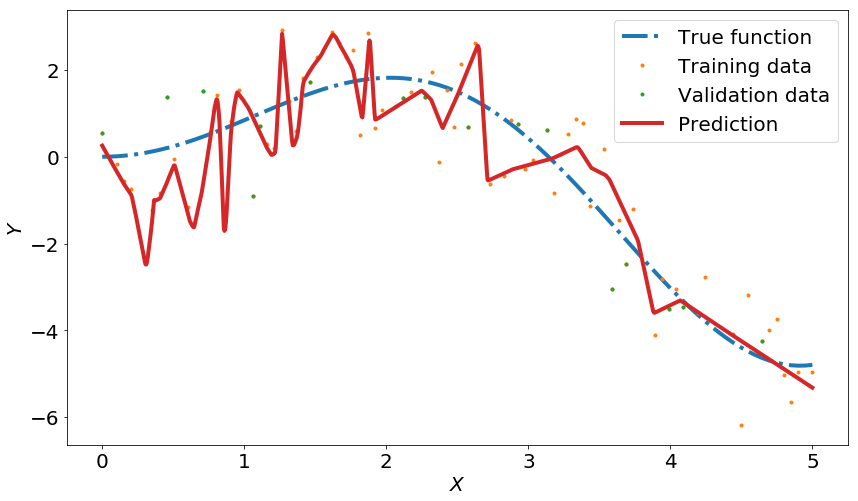

In [8]:
# use our model to predict in the range we want
X_range = np.linspace(0.0, 5, 1000)
y_pred = model.predict(X_range)

# Now plot everything
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.plot(X_true, Y_true, ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_val, Y_val, '.', label='Validation data')
ax.plot(X_range, y_pred, lw=4, label='Prediction')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

The prediction looks pretty bad.  The neural network model is trying to go through all the training points.  This is a classic case of overfitting.  The solution has a lot of oscillations and it rarely fits the validation data.  It may be a good idea to use some kind of regularization.

Let's begin with some penalization methods.

# Penalization
As mentioned in lecture, the loss function can be augmented by an additional term called the penalization term.  Mathematically, the goal is to find the set of weights $W$ that minimize the functional $$J_{R}\left(W; X, y\right) = J\left(W; X, y\right) + \alpha\Omega\left(W\right)$$
where $\alpha$ is called the regularization (or penalization) parameter.  In this lab, $\displaystyle J\left(W; X, y\right)$ is the MSE loss function.

Next, we consider the effect of two different forms for the penalization term: $L_{1}$ and $L_{2}$ penalization.  For reference, 
$$\Omega_{L_{1}} = \frac{1}{2}\left\|W\right\|_{1}$$
and 
$$\Omega_{L_{2}} = \frac{1}{2}\|W\|^{2}_{2}.$$

Note that the biases are not being penalized.

## Exercise
Fit the same network as above ($5$ hidden layers, $100$ nodes per layer, linear output layer), but this time use $L_{2}$ and $L_{1}$ regularization.

**Deliverables:**
* Make two figures, one on top of the other.
* The first figure should contain the following:
  - True solution
  - Training data
  - Validation data
  - Neural network prediction without regularization
  - Neural network prediction with $L_{2}$ regularization
* The second figure should contain the following:
  - True solution
  - Training data
  - Validation data
  - Neural network prediction without regularization
  - Neural network prediction with $L_{1}$ regularization
* **Make sure everything is clearly labeled!**
* Discuss the results.

**Hints:**
* Use `kernel_regularizer=regularizers.l2(alpha)` after the `activation` argument in each of your layers.
* Choose a value for `alpha` that you think works well.  You may need to play around with this a little bit.
* See the `Keras` documentation on regularization:  [Usage of regularizers](https://keras.io/regularizers/)
* Here's some pseudo-code:

```python
from keras import regularizers

num_layers = 5
N = 100
alpha = 

input_dim = 1

### Create network
model_L2 = 
model_L2.add()


### Compile network
model_L2.compile()

### Fit model
L2_reg = model_L2.fit()

### Extract validation data
X_val_L2 = 
Y_val_L2 = 

### REPEAT FOR L1
###
###
###

# PLOT
fig, ax = plt.subplots(2, 1, figsize=(20,14), sharex=True)

ax[0].plot() # Top plots
### ...

ax[0].set_ylabel(r'$Y$', fontsize=20)
ax[0].tick_params(labelsize=20)
ax[0].legend(loc=1, fontsize=20)


ax[1].plot() # Bottom plots
### ...
ax[1].set_xlabel(r'$Y$', fontsize=20)
ax[1].set_ylabel(r'$Y$', fontsize=20)
ax[1].tick_params(labelsize=20)
ax[1].legend(loc=1, fontsize=20)

plt.show()
```

### Solution

In [9]:
from keras import regularizers

num_layers = 5
N = 100
alpha = 0.005

input_dim = 1

model_L2 = models.Sequential()

model_L2.add(layers.Dense(N, input_dim=input_dim, kernel_initializer='normal', activation='tanh', 
                          kernel_regularizer=regularizers.l2(alpha)))

for h in range(num_layers):
    model_L2.add(layers.Dense(N, activation='tanh', kernel_regularizer=regularizers.l2(alpha)))
    
model_L2.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(alpha)))

model_L2.compile(loss='mean_squared_error', optimizer='adam')

L2_reg = model_L2.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

# Validation set
X_val_L2 = L2_reg.validation_data[0]
Y_val_L2 = L2_reg.validation_data[1]

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 11ms/step - loss: 8.4886 - val_loss: 6.2393
Epoch 2/2500
64/64 [==============================] - 0s 48us/step - loss: 7.4537 - val_loss: 5.9089
Epoch 3/2500
64/64 [==============================] - 0s 103us/step - loss: 7.2344 - val_loss: 5.9361
Epoch 4/2500
64/64 [==============================] - 0s 64us/step - loss: 7.3425 - val_loss: 5.8566
Epoch 5/2500
64/64 [==============================] - 0s 58us/step - loss: 7.2668 - val_loss: 5.7155
Epoch 6/2500
64/64 [==============================] - 0s 135us/step - loss: 7.0854 - val_loss: 5.6541
Epoch 7/2500
64/64 [==============================] - 0s 495us/step - loss: 6.9740 - val_loss: 5.6841
Epoch 8/2500
64/64 [==============================] - 0s 431us/step - loss: 6.9661 - val_loss: 5.7071
Epoch 9/2500
64/64 [==============================] - 0s 57us/step - loss: 6.9723 - val_loss: 5.6535
Epoch 10/2500
64/64 [======================

Epoch 81/2500
64/64 [==============================] - 0s 68us/step - loss: 4.4452 - val_loss: 3.5542
Epoch 82/2500
64/64 [==============================] - 0s 69us/step - loss: 4.1235 - val_loss: 3.0646
Epoch 83/2500
64/64 [==============================] - 0s 67us/step - loss: 3.7999 - val_loss: 3.0037
Epoch 84/2500
64/64 [==============================] - 0s 511us/step - loss: 4.0125 - val_loss: 3.9903
Epoch 85/2500
64/64 [==============================] - 0s 286us/step - loss: 4.2072 - val_loss: 2.9525
Epoch 86/2500
64/64 [==============================] - 0s 59us/step - loss: 3.8812 - val_loss: 2.9057
Epoch 87/2500
64/64 [==============================] - 0s 96us/step - loss: 3.4634 - val_loss: 3.7561
Epoch 88/2500
64/64 [==============================] - 0s 1ms/step - loss: 3.8248 - val_loss: 3.2311
Epoch 89/2500
64/64 [==============================] - 0s 370us/step - loss: 4.3031 - val_loss: 3.4752
Epoch 90/2500
64/64 [==============================] - 0s 99us/step - loss: 3.52

Epoch 161/2500
64/64 [==============================] - 0s 54us/step - loss: 2.6376 - val_loss: 2.8181
Epoch 162/2500
64/64 [==============================] - 0s 47us/step - loss: 2.6350 - val_loss: 2.8739
Epoch 163/2500
64/64 [==============================] - 0s 73us/step - loss: 2.6319 - val_loss: 2.8182
Epoch 164/2500
64/64 [==============================] - 0s 139us/step - loss: 2.6275 - val_loss: 2.8339
Epoch 165/2500
64/64 [==============================] - 0s 56us/step - loss: 2.6235 - val_loss: 2.8502
Epoch 166/2500
64/64 [==============================] - 0s 78us/step - loss: 2.6204 - val_loss: 2.8024
Epoch 167/2500
64/64 [==============================] - 0s 64us/step - loss: 2.6174 - val_loss: 2.8462
Epoch 168/2500
64/64 [==============================] - 0s 266us/step - loss: 2.6135 - val_loss: 2.8150
Epoch 169/2500
64/64 [==============================] - 0s 104us/step - loss: 2.6095 - val_loss: 2.8094
Epoch 170/2500
64/64 [==============================] - 0s 206us/step 

Epoch 241/2500
64/64 [==============================] - 0s 57us/step - loss: 2.4327 - val_loss: 2.3848
Epoch 242/2500
64/64 [==============================] - 0s 62us/step - loss: 2.4346 - val_loss: 2.6221
Epoch 243/2500
64/64 [==============================] - 0s 230us/step - loss: 2.3829 - val_loss: 2.5875
Epoch 244/2500
64/64 [==============================] - 0s 302us/step - loss: 2.3715 - val_loss: 2.4125
Epoch 245/2500
64/64 [==============================] - 0s 60us/step - loss: 2.4019 - val_loss: 2.7601
Epoch 246/2500
64/64 [==============================] - 0s 79us/step - loss: 2.4047 - val_loss: 2.4494
Epoch 247/2500
64/64 [==============================] - 0s 364us/step - loss: 2.3748 - val_loss: 2.5625
Epoch 248/2500
64/64 [==============================] - 0s 67us/step - loss: 2.3513 - val_loss: 2.6529
Epoch 249/2500
64/64 [==============================] - 0s 107us/step - loss: 2.3589 - val_loss: 2.4468
Epoch 250/2500
64/64 [==============================] - 0s 159us/step

Epoch 321/2500
64/64 [==============================] - 0s 73us/step - loss: 2.1784 - val_loss: 2.3257
Epoch 322/2500
64/64 [==============================] - 0s 158us/step - loss: 2.1479 - val_loss: 2.2874
Epoch 323/2500
64/64 [==============================] - 0s 47us/step - loss: 2.1568 - val_loss: 2.5547
Epoch 324/2500
64/64 [==============================] - 0s 64us/step - loss: 2.1835 - val_loss: 2.2624
Epoch 325/2500
64/64 [==============================] - 0s 53us/step - loss: 2.2024 - val_loss: 2.6007
Epoch 326/2500
64/64 [==============================] - 0s 111us/step - loss: 2.1910 - val_loss: 2.2852
Epoch 327/2500
64/64 [==============================] - 0s 239us/step - loss: 2.1690 - val_loss: 2.4629
Epoch 328/2500
64/64 [==============================] - 0s 98us/step - loss: 2.1440 - val_loss: 2.3640
Epoch 329/2500
64/64 [==============================] - 0s 71us/step - loss: 2.1315 - val_loss: 2.3320
Epoch 330/2500
64/64 [==============================] - 0s 348us/step 

Epoch 401/2500
64/64 [==============================] - 0s 240us/step - loss: 2.0209 - val_loss: 2.2958
Epoch 402/2500
64/64 [==============================] - 0s 181us/step - loss: 2.0081 - val_loss: 2.1821
Epoch 403/2500
64/64 [==============================] - 0s 61us/step - loss: 1.9988 - val_loss: 2.2191
Epoch 404/2500
64/64 [==============================] - 0s 57us/step - loss: 1.9941 - val_loss: 2.2442
Epoch 405/2500
64/64 [==============================] - 0s 51us/step - loss: 1.9939 - val_loss: 2.1741
Epoch 406/2500
64/64 [==============================] - 0s 64us/step - loss: 1.9966 - val_loss: 2.3020
Epoch 407/2500
64/64 [==============================] - 0s 337us/step - loss: 1.9999 - val_loss: 2.1563
Epoch 408/2500
64/64 [==============================] - 0s 79us/step - loss: 2.0033 - val_loss: 2.3352
Epoch 409/2500
64/64 [==============================] - 0s 151us/step - loss: 2.0045 - val_loss: 2.1506
Epoch 410/2500
64/64 [==============================] - 0s 82us/step 

Epoch 481/2500
64/64 [==============================] - 0s 65us/step - loss: 1.9006 - val_loss: 2.2422
Epoch 482/2500
64/64 [==============================] - 0s 57us/step - loss: 1.8998 - val_loss: 2.0505
Epoch 483/2500
64/64 [==============================] - 0s 364us/step - loss: 1.8993 - val_loss: 2.2328
Epoch 484/2500
64/64 [==============================] - 0s 65us/step - loss: 1.8961 - val_loss: 2.0490
Epoch 485/2500
64/64 [==============================] - 0s 63us/step - loss: 1.8926 - val_loss: 2.2013
Epoch 486/2500
64/64 [==============================] - 0s 329us/step - loss: 1.8871 - val_loss: 2.0577
Epoch 487/2500
64/64 [==============================] - 0s 62us/step - loss: 1.8815 - val_loss: 2.1527
Epoch 488/2500
64/64 [==============================] - 0s 60us/step - loss: 1.8759 - val_loss: 2.0821
Epoch 489/2500
64/64 [==============================] - 0s 61us/step - loss: 1.8717 - val_loss: 2.1045
Epoch 490/2500
64/64 [==============================] - 0s 257us/step -

Epoch 561/2500
64/64 [==============================] - 0s 80us/step - loss: 1.7845 - val_loss: 2.0515
Epoch 562/2500
64/64 [==============================] - 0s 114us/step - loss: 1.7848 - val_loss: 1.9826
Epoch 563/2500
64/64 [==============================] - 0s 241us/step - loss: 1.7871 - val_loss: 2.0975
Epoch 564/2500
64/64 [==============================] - 0s 116us/step - loss: 1.7895 - val_loss: 1.9691
Epoch 565/2500
64/64 [==============================] - 0s 60us/step - loss: 1.7920 - val_loss: 2.1259
Epoch 566/2500
64/64 [==============================] - 0s 436us/step - loss: 1.7932 - val_loss: 1.9628
Epoch 567/2500
64/64 [==============================] - 0s 293us/step - loss: 1.7942 - val_loss: 2.1357
Epoch 568/2500
64/64 [==============================] - 0s 146us/step - loss: 1.7938 - val_loss: 1.9588
Epoch 569/2500
64/64 [==============================] - 0s 105us/step - loss: 1.7932 - val_loss: 2.1266
Epoch 570/2500
64/64 [==============================] - 0s 244us/s

Epoch 641/2500
64/64 [==============================] - 0s 75us/step - loss: 1.7036 - val_loss: 1.9623
Epoch 642/2500
64/64 [==============================] - 0s 56us/step - loss: 1.7026 - val_loss: 1.9498
Epoch 643/2500
64/64 [==============================] - 0s 59us/step - loss: 1.7017 - val_loss: 1.9610
Epoch 644/2500
64/64 [==============================] - 0s 131us/step - loss: 1.7008 - val_loss: 1.9480
Epoch 645/2500
64/64 [==============================] - 0s 50us/step - loss: 1.6999 - val_loss: 1.9598
Epoch 646/2500
64/64 [==============================] - 0s 65us/step - loss: 1.6990 - val_loss: 1.9460
Epoch 647/2500
64/64 [==============================] - 0s 53us/step - loss: 1.6981 - val_loss: 1.9589
Epoch 648/2500
64/64 [==============================] - 0s 66us/step - loss: 1.6971 - val_loss: 1.9436
Epoch 649/2500
64/64 [==============================] - 0s 215us/step - loss: 1.6962 - val_loss: 1.9582
Epoch 650/2500
64/64 [==============================] - 0s 57us/step - 

Epoch 721/2500
64/64 [==============================] - 0s 90us/step - loss: 1.6351 - val_loss: 1.8859
Epoch 722/2500
64/64 [==============================] - 0s 158us/step - loss: 1.6341 - val_loss: 1.8994
Epoch 723/2500
64/64 [==============================] - 0s 114us/step - loss: 1.6332 - val_loss: 1.8919
Epoch 724/2500
64/64 [==============================] - 0s 262us/step - loss: 1.6324 - val_loss: 1.8926
Epoch 725/2500
64/64 [==============================] - 0s 82us/step - loss: 1.6316 - val_loss: 1.8973
Epoch 726/2500
64/64 [==============================] - 0s 296us/step - loss: 1.6309 - val_loss: 1.8873
Epoch 727/2500
64/64 [==============================] - 0s 73us/step - loss: 1.6301 - val_loss: 1.9006
Epoch 728/2500
64/64 [==============================] - 0s 151us/step - loss: 1.6294 - val_loss: 1.8835
Epoch 729/2500
64/64 [==============================] - 0s 81us/step - loss: 1.6287 - val_loss: 1.9011
Epoch 730/2500
64/64 [==============================] - 0s 411us/ste

Epoch 801/2500
64/64 [==============================] - 0s 261us/step - loss: 1.5760 - val_loss: 1.8453
Epoch 802/2500
64/64 [==============================] - 0s 94us/step - loss: 1.5754 - val_loss: 1.8449
Epoch 803/2500
64/64 [==============================] - 0s 412us/step - loss: 1.5747 - val_loss: 1.8442
Epoch 804/2500
64/64 [==============================] - 0s 302us/step - loss: 1.5740 - val_loss: 1.8438
Epoch 805/2500
64/64 [==============================] - 0s 70us/step - loss: 1.5733 - val_loss: 1.8431
Epoch 806/2500
64/64 [==============================] - 0s 88us/step - loss: 1.5726 - val_loss: 1.8426
Epoch 807/2500
64/64 [==============================] - 0s 388us/step - loss: 1.5718 - val_loss: 1.8420
Epoch 808/2500
64/64 [==============================] - 0s 78us/step - loss: 1.5713 - val_loss: 1.8415
Epoch 809/2500
64/64 [==============================] - 0s 80us/step - loss: 1.5706 - val_loss: 1.8410
Epoch 810/2500
64/64 [==============================] - 0s 114us/step

Epoch 881/2500
64/64 [==============================] - 0s 66us/step - loss: 1.5267 - val_loss: 1.8379
Epoch 882/2500
64/64 [==============================] - 0s 149us/step - loss: 1.5266 - val_loss: 1.7692
Epoch 883/2500
64/64 [==============================] - 0s 163us/step - loss: 1.5267 - val_loss: 1.8470
Epoch 884/2500
64/64 [==============================] - 0s 74us/step - loss: 1.5269 - val_loss: 1.7601
Epoch 885/2500
64/64 [==============================] - 0s 63us/step - loss: 1.5274 - val_loss: 1.8582
Epoch 886/2500
64/64 [==============================] - 0s 220us/step - loss: 1.5279 - val_loss: 1.7501
Epoch 887/2500
64/64 [==============================] - 0s 59us/step - loss: 1.5289 - val_loss: 1.8711
Epoch 888/2500
64/64 [==============================] - 0s 76us/step - loss: 1.5297 - val_loss: 1.7402
Epoch 889/2500
64/64 [==============================] - 0s 95us/step - loss: 1.5310 - val_loss: 1.8831
Epoch 890/2500
64/64 [==============================] - 0s 168us/step 

Epoch 961/2500
64/64 [==============================] - 0s 48us/step - loss: 1.4802 - val_loss: 1.7673
Epoch 962/2500
64/64 [==============================] - 0s 95us/step - loss: 1.4796 - val_loss: 1.7714
Epoch 963/2500
64/64 [==============================] - 0s 80us/step - loss: 1.4791 - val_loss: 1.7676
Epoch 964/2500
64/64 [==============================] - 0s 299us/step - loss: 1.4784 - val_loss: 1.7695
Epoch 965/2500
64/64 [==============================] - 0s 76us/step - loss: 1.4781 - val_loss: 1.7679
Epoch 966/2500
64/64 [==============================] - 0s 79us/step - loss: 1.4775 - val_loss: 1.7674
Epoch 967/2500
64/64 [==============================] - 0s 241us/step - loss: 1.4770 - val_loss: 1.7679
Epoch 968/2500
64/64 [==============================] - 0s 81us/step - loss: 1.4765 - val_loss: 1.7656
Epoch 969/2500
64/64 [==============================] - 0s 57us/step - loss: 1.4760 - val_loss: 1.7676
Epoch 970/2500
64/64 [==============================] - 0s 58us/step - 

Epoch 1040/2500
64/64 [==============================] - 0s 85us/step - loss: 1.4414 - val_loss: 1.7406
Epoch 1041/2500
64/64 [==============================] - 0s 69us/step - loss: 1.4409 - val_loss: 1.7402
Epoch 1042/2500
64/64 [==============================] - 0s 224us/step - loss: 1.4404 - val_loss: 1.7399
Epoch 1043/2500
64/64 [==============================] - 0s 102us/step - loss: 1.4400 - val_loss: 1.7395
Epoch 1044/2500
64/64 [==============================] - 0s 60us/step - loss: 1.4395 - val_loss: 1.7392
Epoch 1045/2500
64/64 [==============================] - 0s 88us/step - loss: 1.4389 - val_loss: 1.7388
Epoch 1046/2500
64/64 [==============================] - 0s 136us/step - loss: 1.4386 - val_loss: 1.7386
Epoch 1047/2500
64/64 [==============================] - 0s 83us/step - loss: 1.4381 - val_loss: 1.7382
Epoch 1048/2500
64/64 [==============================] - 0s 114us/step - loss: 1.4377 - val_loss: 1.7379
Epoch 1049/2500
64/64 [==============================] - 0s 

Epoch 1119/2500
64/64 [==============================] - 0s 242us/step - loss: 1.4067 - val_loss: 1.7155
Epoch 1120/2500
64/64 [==============================] - 0s 63us/step - loss: 1.4064 - val_loss: 1.7153
Epoch 1121/2500
64/64 [==============================] - 0s 55us/step - loss: 1.4060 - val_loss: 1.7150
Epoch 1122/2500
64/64 [==============================] - 0s 75us/step - loss: 1.4055 - val_loss: 1.7147
Epoch 1123/2500
64/64 [==============================] - 0s 273us/step - loss: 1.4052 - val_loss: 1.7144
Epoch 1124/2500
64/64 [==============================] - 0s 76us/step - loss: 1.4048 - val_loss: 1.7141
Epoch 1125/2500
64/64 [==============================] - 0s 282us/step - loss: 1.4044 - val_loss: 1.7138
Epoch 1126/2500
64/64 [==============================] - 0s 101us/step - loss: 1.4039 - val_loss: 1.7135
Epoch 1127/2500
64/64 [==============================] - 0s 94us/step - loss: 1.4035 - val_loss: 1.7132
Epoch 1128/2500
64/64 [==============================] - 0s 

Epoch 1198/2500
64/64 [==============================] - 0s 205us/step - loss: 1.3759 - val_loss: 1.6934
Epoch 1199/2500
64/64 [==============================] - 0s 81us/step - loss: 1.3755 - val_loss: 1.6931
Epoch 1200/2500
64/64 [==============================] - 0s 94us/step - loss: 1.3752 - val_loss: 1.6928
Epoch 1201/2500
64/64 [==============================] - 0s 179us/step - loss: 1.3748 - val_loss: 1.6925
Epoch 1202/2500
64/64 [==============================] - 0s 117us/step - loss: 1.3744 - val_loss: 1.6923
Epoch 1203/2500
64/64 [==============================] - 0s 50us/step - loss: 1.3740 - val_loss: 1.6920
Epoch 1204/2500
64/64 [==============================] - 0s 224us/step - loss: 1.3737 - val_loss: 1.6918
Epoch 1205/2500
64/64 [==============================] - 0s 81us/step - loss: 1.3733 - val_loss: 1.6915
Epoch 1206/2500
64/64 [==============================] - 0s 83us/step - loss: 1.3729 - val_loss: 1.6912
Epoch 1207/2500
64/64 [==============================] - 0s 

Epoch 1277/2500
64/64 [==============================] - 0s 83us/step - loss: 1.3480 - val_loss: 1.6730
Epoch 1278/2500
64/64 [==============================] - 0s 70us/step - loss: 1.3477 - val_loss: 1.6727
Epoch 1279/2500
64/64 [==============================] - 0s 457us/step - loss: 1.3473 - val_loss: 1.6725
Epoch 1280/2500
64/64 [==============================] - 0s 80us/step - loss: 1.3470 - val_loss: 1.6722
Epoch 1281/2500
64/64 [==============================] - 0s 307us/step - loss: 1.3467 - val_loss: 1.6720
Epoch 1282/2500
64/64 [==============================] - 0s 99us/step - loss: 1.3463 - val_loss: 1.6717
Epoch 1283/2500
64/64 [==============================] - 0s 476us/step - loss: 1.3460 - val_loss: 1.6715
Epoch 1284/2500
64/64 [==============================] - 0s 381us/step - loss: 1.3457 - val_loss: 1.6712
Epoch 1285/2500
64/64 [==============================] - 0s 78us/step - loss: 1.3453 - val_loss: 1.6710
Epoch 1286/2500
64/64 [==============================] - 0s 

Epoch 1356/2500
64/64 [==============================] - 0s 81us/step - loss: 1.3228 - val_loss: 1.6460
Epoch 1357/2500
64/64 [==============================] - 0s 300us/step - loss: 1.3225 - val_loss: 1.6623
Epoch 1358/2500
64/64 [==============================] - 0s 71us/step - loss: 1.3222 - val_loss: 1.6439
Epoch 1359/2500
64/64 [==============================] - 0s 250us/step - loss: 1.3220 - val_loss: 1.6637
Epoch 1360/2500
64/64 [==============================] - 0s 121us/step - loss: 1.3217 - val_loss: 1.6415
Epoch 1361/2500
64/64 [==============================] - 0s 87us/step - loss: 1.3214 - val_loss: 1.6654
Epoch 1362/2500
64/64 [==============================] - 0s 344us/step - loss: 1.3212 - val_loss: 1.6388
Epoch 1363/2500
64/64 [==============================] - 0s 337us/step - loss: 1.3210 - val_loss: 1.6676
Epoch 1364/2500
64/64 [==============================] - 0s 84us/step - loss: 1.3208 - val_loss: 1.6357
Epoch 1365/2500
64/64 [==============================] - 0s

Epoch 1435/2500
64/64 [==============================] - 0s 120us/step - loss: 1.2996 - val_loss: 1.6335
Epoch 1436/2500
64/64 [==============================] - 0s 87us/step - loss: 1.2993 - val_loss: 1.6367
Epoch 1437/2500
64/64 [==============================] - 0s 81us/step - loss: 1.2990 - val_loss: 1.6336
Epoch 1438/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2987 - val_loss: 1.6355
Epoch 1439/2500
64/64 [==============================] - 0s 130us/step - loss: 1.2984 - val_loss: 1.6338
Epoch 1440/2500
64/64 [==============================] - 0s 55us/step - loss: 1.2981 - val_loss: 1.6344
Epoch 1441/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2979 - val_loss: 1.6339
Epoch 1442/2500
64/64 [==============================] - 0s 134us/step - loss: 1.2976 - val_loss: 1.6334
Epoch 1443/2500
64/64 [==============================] - 0s 83us/step - loss: 1.2973 - val_loss: 1.6341
Epoch 1444/2500
64/64 [==============================] - 0s 7

Epoch 1514/2500
64/64 [==============================] - 0s 60us/step - loss: 1.2783 - val_loss: 1.6173
Epoch 1515/2500
64/64 [==============================] - 0s 127us/step - loss: 1.2780 - val_loss: 1.6170
Epoch 1516/2500
64/64 [==============================] - 0s 82us/step - loss: 1.2778 - val_loss: 1.6168
Epoch 1517/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2775 - val_loss: 1.6165
Epoch 1518/2500
64/64 [==============================] - 0s 74us/step - loss: 1.2772 - val_loss: 1.6163
Epoch 1519/2500
64/64 [==============================] - 0s 111us/step - loss: 1.2770 - val_loss: 1.6161
Epoch 1520/2500
64/64 [==============================] - 0s 359us/step - loss: 1.2767 - val_loss: 1.6159
Epoch 1521/2500
64/64 [==============================] - 0s 589us/step - loss: 1.2765 - val_loss: 1.6156
Epoch 1522/2500
64/64 [==============================] - 0s 157us/step - loss: 1.2762 - val_loss: 1.6154
Epoch 1523/2500
64/64 [==============================] - 0s

Epoch 1593/2500
64/64 [==============================] - 0s 63us/step - loss: 1.2586 - val_loss: 1.5993
Epoch 1594/2500
64/64 [==============================] - 0s 173us/step - loss: 1.2583 - val_loss: 1.5991
Epoch 1595/2500
64/64 [==============================] - 0s 126us/step - loss: 1.2581 - val_loss: 1.5988
Epoch 1596/2500
64/64 [==============================] - 0s 56us/step - loss: 1.2579 - val_loss: 1.5986
Epoch 1597/2500
64/64 [==============================] - 0s 139us/step - loss: 1.2576 - val_loss: 1.5984
Epoch 1598/2500
64/64 [==============================] - 0s 117us/step - loss: 1.2574 - val_loss: 1.5982
Epoch 1599/2500
64/64 [==============================] - 0s 90us/step - loss: 1.2571 - val_loss: 1.5979
Epoch 1600/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2569 - val_loss: 1.5977
Epoch 1601/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2567 - val_loss: 1.5975
Epoch 1602/2500
64/64 [==============================] - 0s 

Epoch 1672/2500
64/64 [==============================] - 0s 48us/step - loss: 1.2402 - val_loss: 1.5816
Epoch 1673/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2400 - val_loss: 1.5813
Epoch 1674/2500
64/64 [==============================] - 0s 47us/step - loss: 1.2398 - val_loss: 1.5811
Epoch 1675/2500
64/64 [==============================] - 0s 173us/step - loss: 1.2395 - val_loss: 1.5809
Epoch 1676/2500
64/64 [==============================] - 0s 102us/step - loss: 1.2393 - val_loss: 1.5807
Epoch 1677/2500
64/64 [==============================] - 0s 68us/step - loss: 1.2391 - val_loss: 1.5804
Epoch 1678/2500
64/64 [==============================] - 0s 60us/step - loss: 1.2389 - val_loss: 1.5802
Epoch 1679/2500
64/64 [==============================] - 0s 59us/step - loss: 1.2386 - val_loss: 1.5800
Epoch 1680/2500
64/64 [==============================] - 0s 143us/step - loss: 1.2384 - val_loss: 1.5798
Epoch 1681/2500
64/64 [==============================] - 0s 4

Epoch 1751/2500
64/64 [==============================] - 0s 388us/step - loss: 1.2230 - val_loss: 1.5640
Epoch 1752/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2228 - val_loss: 1.5638
Epoch 1753/2500
64/64 [==============================] - 0s 325us/step - loss: 1.2226 - val_loss: 1.5636
Epoch 1754/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2224 - val_loss: 1.5633
Epoch 1755/2500
64/64 [==============================] - 0s 74us/step - loss: 1.2222 - val_loss: 1.5631
Epoch 1756/2500
64/64 [==============================] - 0s 97us/step - loss: 1.2220 - val_loss: 1.5629
Epoch 1757/2500
64/64 [==============================] - 0s 215us/step - loss: 1.2217 - val_loss: 1.5627
Epoch 1758/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2216 - val_loss: 1.5625
Epoch 1759/2500
64/64 [==============================] - 0s 59us/step - loss: 1.2213 - val_loss: 1.5622
Epoch 1760/2500
64/64 [==============================] - 0s 3

Epoch 1830/2500
64/64 [==============================] - 0s 137us/step - loss: 1.2069 - val_loss: 1.5466
Epoch 1831/2500
64/64 [==============================] - 0s 355us/step - loss: 1.2067 - val_loss: 1.5464
Epoch 1832/2500
64/64 [==============================] - 0s 86us/step - loss: 1.2065 - val_loss: 1.5462
Epoch 1833/2500
64/64 [==============================] - 0s 834us/step - loss: 1.2063 - val_loss: 1.5459
Epoch 1834/2500
64/64 [==============================] - 0s 99us/step - loss: 1.2061 - val_loss: 1.5457
Epoch 1835/2500
64/64 [==============================] - 0s 411us/step - loss: 1.2059 - val_loss: 1.5455
Epoch 1836/2500
64/64 [==============================] - 0s 393us/step - loss: 1.2057 - val_loss: 1.5453
Epoch 1837/2500
64/64 [==============================] - 0s 74us/step - loss: 1.2055 - val_loss: 1.5451
Epoch 1838/2500
64/64 [==============================] - 0s 383us/step - loss: 1.2053 - val_loss: 1.5449
Epoch 1839/2500
64/64 [==============================] - 0

Epoch 1909/2500
64/64 [==============================] - 0s 47us/step - loss: 1.1916 - val_loss: 1.5293
Epoch 1910/2500
64/64 [==============================] - 0s 220us/step - loss: 1.1915 - val_loss: 1.5291
Epoch 1911/2500
64/64 [==============================] - 0s 236us/step - loss: 1.1913 - val_loss: 1.5289
Epoch 1912/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1911 - val_loss: 1.5286
Epoch 1913/2500
64/64 [==============================] - 0s 100us/step - loss: 1.1909 - val_loss: 1.5284
Epoch 1914/2500
64/64 [==============================] - 0s 138us/step - loss: 1.1907 - val_loss: 1.5282
Epoch 1915/2500
64/64 [==============================] - 0s 105us/step - loss: 1.1905 - val_loss: 1.5280
Epoch 1916/2500
64/64 [==============================] - 0s 199us/step - loss: 1.1903 - val_loss: 1.5278
Epoch 1917/2500
64/64 [==============================] - 0s 1ms/step - loss: 1.1901 - val_loss: 1.5276
Epoch 1918/2500
64/64 [==============================] - 0s

Epoch 1988/2500
64/64 [==============================] - 0s 85us/step - loss: 1.1772 - val_loss: 1.5120
Epoch 1989/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1771 - val_loss: 1.5118
Epoch 1990/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1769 - val_loss: 1.5116
Epoch 1991/2500
64/64 [==============================] - 0s 224us/step - loss: 1.1767 - val_loss: 1.5114
Epoch 1992/2500
64/64 [==============================] - 0s 171us/step - loss: 1.1765 - val_loss: 1.5112
Epoch 1993/2500
64/64 [==============================] - 0s 365us/step - loss: 1.1763 - val_loss: 1.5109
Epoch 1994/2500
64/64 [==============================] - 0s 103us/step - loss: 1.1762 - val_loss: 1.5107
Epoch 1995/2500
64/64 [==============================] - 0s 430us/step - loss: 1.1760 - val_loss: 1.5105
Epoch 1996/2500
64/64 [==============================] - 0s 503us/step - loss: 1.1758 - val_loss: 1.5103
Epoch 1997/2500
64/64 [==============================] - 0

Epoch 2067/2500
64/64 [==============================] - 0s 140us/step - loss: 1.1635 - val_loss: 1.4947
Epoch 2068/2500
64/64 [==============================] - 0s 238us/step - loss: 1.1634 - val_loss: 1.4945
Epoch 2069/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1632 - val_loss: 1.4943
Epoch 2070/2500
64/64 [==============================] - 0s 163us/step - loss: 1.1630 - val_loss: 1.4940
Epoch 2071/2500
64/64 [==============================] - 0s 164us/step - loss: 1.1629 - val_loss: 1.4938
Epoch 2072/2500
64/64 [==============================] - 0s 62us/step - loss: 1.1627 - val_loss: 1.4936
Epoch 2073/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1625 - val_loss: 1.4934
Epoch 2074/2500
64/64 [==============================] - 0s 120us/step - loss: 1.1624 - val_loss: 1.4932
Epoch 2075/2500
64/64 [==============================] - 0s 118us/step - loss: 1.1622 - val_loss: 1.4929
Epoch 2076/2500
64/64 [==============================] - 0

Epoch 2146/2500
64/64 [==============================] - 0s 183us/step - loss: 1.1505 - val_loss: 1.4772
Epoch 2147/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1504 - val_loss: 1.4770
Epoch 2148/2500
64/64 [==============================] - 0s 92us/step - loss: 1.1502 - val_loss: 1.4768
Epoch 2149/2500
64/64 [==============================] - 0s 142us/step - loss: 1.1500 - val_loss: 1.4766
Epoch 2150/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1499 - val_loss: 1.4763
Epoch 2151/2500
64/64 [==============================] - 0s 134us/step - loss: 1.1497 - val_loss: 1.4761
Epoch 2152/2500
64/64 [==============================] - 0s 172us/step - loss: 1.1496 - val_loss: 1.4759
Epoch 2153/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1494 - val_loss: 1.4757
Epoch 2154/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1492 - val_loss: 1.4754
Epoch 2155/2500
64/64 [==============================] - 0s 

Epoch 2225/2500
64/64 [==============================] - 0s 107us/step - loss: 1.1381 - val_loss: 1.4595
Epoch 2226/2500
64/64 [==============================] - 0s 344us/step - loss: 1.1380 - val_loss: 1.4593
Epoch 2227/2500
64/64 [==============================] - 0s 82us/step - loss: 1.1378 - val_loss: 1.4591
Epoch 2228/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1377 - val_loss: 1.4588
Epoch 2229/2500
64/64 [==============================] - 0s 85us/step - loss: 1.1375 - val_loss: 1.4586
Epoch 2230/2500
64/64 [==============================] - 0s 312us/step - loss: 1.1374 - val_loss: 1.4584
Epoch 2231/2500
64/64 [==============================] - 0s 99us/step - loss: 1.1372 - val_loss: 1.4582
Epoch 2232/2500
64/64 [==============================] - 0s 83us/step - loss: 1.1370 - val_loss: 1.4579
Epoch 2233/2500
64/64 [==============================] - 0s 291us/step - loss: 1.1369 - val_loss: 1.4577
Epoch 2234/2500
64/64 [==============================] - 0s 

Epoch 2304/2500
64/64 [==============================] - 0s 335us/step - loss: 1.1263 - val_loss: 1.4416
Epoch 2305/2500
64/64 [==============================] - 0s 100us/step - loss: 1.1261 - val_loss: 1.4414
Epoch 2306/2500
64/64 [==============================] - 0s 511us/step - loss: 1.1260 - val_loss: 1.4412
Epoch 2307/2500
64/64 [==============================] - 0s 104us/step - loss: 1.1258 - val_loss: 1.4409
Epoch 2308/2500
64/64 [==============================] - 0s 487us/step - loss: 1.1257 - val_loss: 1.4407
Epoch 2309/2500
64/64 [==============================] - 0s 540us/step - loss: 1.1255 - val_loss: 1.4405
Epoch 2310/2500
64/64 [==============================] - 0s 307us/step - loss: 1.1254 - val_loss: 1.4403
Epoch 2311/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1253 - val_loss: 1.4400
Epoch 2312/2500
64/64 [==============================] - 0s 481us/step - loss: 1.1251 - val_loss: 1.4398
Epoch 2313/2500
64/64 [==============================] -

Epoch 2383/2500
64/64 [==============================] - 0s 200us/step - loss: 1.1150 - val_loss: 1.4237
Epoch 2384/2500
64/64 [==============================] - 0s 142us/step - loss: 1.1148 - val_loss: 1.4234
Epoch 2385/2500
64/64 [==============================] - 0s 889us/step - loss: 1.1147 - val_loss: 1.4232
Epoch 2386/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1146 - val_loss: 1.4230
Epoch 2387/2500
64/64 [==============================] - 0s 333us/step - loss: 1.1144 - val_loss: 1.4228
Epoch 2388/2500
64/64 [==============================] - 0s 194us/step - loss: 1.1143 - val_loss: 1.4225
Epoch 2389/2500
64/64 [==============================] - 0s 211us/step - loss: 1.1141 - val_loss: 1.4223
Epoch 2390/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1140 - val_loss: 1.4221
Epoch 2391/2500
64/64 [==============================] - 0s 112us/step - loss: 1.1139 - val_loss: 1.4219
Epoch 2392/2500
64/64 [==============================] - 

Epoch 2462/2500
64/64 [==============================] - 0s 83us/step - loss: 1.1042 - val_loss: 1.4059
Epoch 2463/2500
64/64 [==============================] - 0s 99us/step - loss: 1.1041 - val_loss: 1.4057
Epoch 2464/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1040 - val_loss: 1.4055
Epoch 2465/2500
64/64 [==============================] - 0s 94us/step - loss: 1.1038 - val_loss: 1.4053
Epoch 2466/2500
64/64 [==============================] - 0s 161us/step - loss: 1.1037 - val_loss: 1.4050
Epoch 2467/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1036 - val_loss: 1.4048
Epoch 2468/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1034 - val_loss: 1.4046
Epoch 2469/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1033 - val_loss: 1.4044
Epoch 2470/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1032 - val_loss: 1.4042
Epoch 2471/2500
64/64 [==============================] - 0s 81u

In [10]:
model_L1 = models.Sequential()

model_L1.add(layers.Dense(N, input_dim=input_dim, kernel_initializer='normal', activation='tanh', 
                          kernel_regularizer=regularizers.l1(alpha)))

for h in range(num_layers):
    model_L1.add(layers.Dense(N, activation='tanh', kernel_regularizer=regularizers.l1(alpha)))
    
model_L1.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l1(alpha)))

model_L1.compile(loss='mean_squared_error', optimizer='adam')
L1_reg = model_L1.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

X_val_L1 = L1_reg.validation_data[0]
Y_val_L1 = L1_reg.validation_data[1]

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 11ms/step - loss: 27.3567 - val_loss: 25.4889
Epoch 2/2500
64/64 [==============================] - 0s 58us/step - loss: 26.6992 - val_loss: 25.0306
Epoch 3/2500
64/64 [==============================] - 0s 50us/step - loss: 26.3300 - val_loss: 24.8770
Epoch 4/2500
64/64 [==============================] - 0s 59us/step - loss: 26.2543 - val_loss: 24.6917
Epoch 5/2500
64/64 [==============================] - 0s 69us/step - loss: 26.0908 - val_loss: 24.4349
Epoch 6/2500
64/64 [==============================] - 0s 62us/step - loss: 25.8122 - val_loss: 24.2058
Epoch 7/2500
64/64 [==============================] - 0s 72us/step - loss: 25.5445 - val_loss: 24.0448
Epoch 8/2500
64/64 [==============================] - 0s 76us/step - loss: 25.3488 - val_loss: 23.9095
Epoch 9/2500
64/64 [==============================] - 0s 42us/step - loss: 25.1931 - val_loss: 23.7417
Epoch 10/2500
64/64 [========

Epoch 80/2500
64/64 [==============================] - 0s 79us/step - loss: 14.2279 - val_loss: 12.6326
Epoch 81/2500
64/64 [==============================] - 0s 105us/step - loss: 14.1002 - val_loss: 12.5052
Epoch 82/2500
64/64 [==============================] - 0s 176us/step - loss: 13.9733 - val_loss: 12.3792
Epoch 83/2500
64/64 [==============================] - 0s 100us/step - loss: 13.8472 - val_loss: 12.2551
Epoch 84/2500
64/64 [==============================] - 0s 77us/step - loss: 13.7220 - val_loss: 12.1325
Epoch 85/2500
64/64 [==============================] - 0s 355us/step - loss: 13.5975 - val_loss: 12.0106
Epoch 86/2500
64/64 [==============================] - 0s 99us/step - loss: 13.4737 - val_loss: 11.8891
Epoch 87/2500
64/64 [==============================] - 0s 412us/step - loss: 13.3508 - val_loss: 11.7672
Epoch 88/2500
64/64 [==============================] - 0s 576us/step - loss: 13.2281 - val_loss: 11.6454
Epoch 89/2500
64/64 [==============================] - 0s 

Epoch 159/2500
64/64 [==============================] - 0s 82us/step - loss: 5.1585 - val_loss: 5.0707
Epoch 160/2500
64/64 [==============================] - 0s 269us/step - loss: 5.7640 - val_loss: 4.7994
Epoch 161/2500
64/64 [==============================] - 0s 126us/step - loss: 5.0677 - val_loss: 5.7697
Epoch 162/2500
64/64 [==============================] - 0s 147us/step - loss: 5.4324 - val_loss: 5.2762
Epoch 163/2500
64/64 [==============================] - 0s 116us/step - loss: 5.0608 - val_loss: 4.7903
Epoch 164/2500
64/64 [==============================] - 0s 81us/step - loss: 5.0675 - val_loss: 4.7841
Epoch 165/2500
64/64 [==============================] - 0s 79us/step - loss: 5.0823 - val_loss: 4.9413
Epoch 166/2500
64/64 [==============================] - 0s 80us/step - loss: 4.7743 - val_loss: 5.4357
Epoch 167/2500
64/64 [==============================] - 0s 283us/step - loss: 5.0163 - val_loss: 4.7528
Epoch 168/2500
64/64 [==============================] - 0s 113us/ste

Epoch 239/2500
64/64 [==============================] - 0s 82us/step - loss: 3.0647 - val_loss: 3.3171
Epoch 240/2500
64/64 [==============================] - 0s 123us/step - loss: 3.0531 - val_loss: 3.3055
Epoch 241/2500
64/64 [==============================] - 0s 767us/step - loss: 3.0417 - val_loss: 3.3006
Epoch 242/2500
64/64 [==============================] - 0s 379us/step - loss: 3.0303 - val_loss: 3.2922
Epoch 243/2500
64/64 [==============================] - 0s 56us/step - loss: 3.0189 - val_loss: 3.2765
Epoch 244/2500
64/64 [==============================] - 0s 436us/step - loss: 3.0076 - val_loss: 3.2618
Epoch 245/2500
64/64 [==============================] - 0s 194us/step - loss: 2.9965 - val_loss: 3.2541
Epoch 246/2500
64/64 [==============================] - 0s 278us/step - loss: 2.9857 - val_loss: 3.2486
Epoch 247/2500
64/64 [==============================] - 0s 331us/step - loss: 2.9750 - val_loss: 3.2375
Epoch 248/2500
64/64 [==============================] - 0s 85us/st

Epoch 319/2500
64/64 [==============================] - 0s 441us/step - loss: 2.4211 - val_loss: 2.7195
Epoch 320/2500
64/64 [==============================] - 0s 81us/step - loss: 2.4156 - val_loss: 2.7146
Epoch 321/2500
64/64 [==============================] - 0s 122us/step - loss: 2.4102 - val_loss: 2.7092
Epoch 322/2500
64/64 [==============================] - 0s 73us/step - loss: 2.4047 - val_loss: 2.7038
Epoch 323/2500
64/64 [==============================] - 0s 73us/step - loss: 2.3992 - val_loss: 2.6988
Epoch 324/2500
64/64 [==============================] - 0s 210us/step - loss: 2.3938 - val_loss: 2.6940
Epoch 325/2500
64/64 [==============================] - 0s 185us/step - loss: 2.3885 - val_loss: 2.6892
Epoch 326/2500
64/64 [==============================] - 0s 149us/step - loss: 2.3833 - val_loss: 2.6844
Epoch 327/2500
64/64 [==============================] - 0s 107us/step - loss: 2.3782 - val_loss: 2.6796
Epoch 328/2500
64/64 [==============================] - 0s 81us/ste

Epoch 399/2500
64/64 [==============================] - 0s 94us/step - loss: 2.0839 - val_loss: 2.4078
Epoch 400/2500
64/64 [==============================] - 0s 244us/step - loss: 2.0803 - val_loss: 2.4051
Epoch 401/2500
64/64 [==============================] - 0s 87us/step - loss: 2.0776 - val_loss: 2.4029
Epoch 402/2500
64/64 [==============================] - 0s 57us/step - loss: 2.0744 - val_loss: 2.4002
Epoch 403/2500
64/64 [==============================] - 0s 385us/step - loss: 2.0711 - val_loss: 2.3974
Epoch 404/2500
64/64 [==============================] - 0s 59us/step - loss: 2.0680 - val_loss: 2.3946
Epoch 405/2500
64/64 [==============================] - 0s 83us/step - loss: 2.0649 - val_loss: 2.3921
Epoch 406/2500
64/64 [==============================] - 0s 78us/step - loss: 2.0618 - val_loss: 2.3894
Epoch 407/2500
64/64 [==============================] - 0s 52us/step - loss: 2.0588 - val_loss: 2.3863
Epoch 408/2500
64/64 [==============================] - 0s 94us/step - 

Epoch 479/2500
64/64 [==============================] - 0s 188us/step - loss: 1.8732 - val_loss: 2.2142
Epoch 480/2500
64/64 [==============================] - 0s 162us/step - loss: 1.8710 - val_loss: 2.2131
Epoch 481/2500
64/64 [==============================] - 0s 71us/step - loss: 1.8689 - val_loss: 2.2111
Epoch 482/2500
64/64 [==============================] - 0s 71us/step - loss: 1.8667 - val_loss: 2.2087
Epoch 483/2500
64/64 [==============================] - 0s 202us/step - loss: 1.8646 - val_loss: 2.2069
Epoch 484/2500
64/64 [==============================] - 0s 55us/step - loss: 1.8626 - val_loss: 2.2054
Epoch 485/2500
64/64 [==============================] - 0s 68us/step - loss: 1.8605 - val_loss: 2.2032
Epoch 486/2500
64/64 [==============================] - 0s 62us/step - loss: 1.8584 - val_loss: 2.2010
Epoch 487/2500
64/64 [==============================] - 0s 63us/step - loss: 1.8563 - val_loss: 2.1990
Epoch 488/2500
64/64 [==============================] - 0s 140us/step 

Epoch 559/2500
64/64 [==============================] - 0s 146us/step - loss: 1.7263 - val_loss: 2.0765
Epoch 560/2500
64/64 [==============================] - 0s 64us/step - loss: 1.7246 - val_loss: 2.0751
Epoch 561/2500
64/64 [==============================] - 0s 74us/step - loss: 1.7231 - val_loss: 2.0735
Epoch 562/2500
64/64 [==============================] - 0s 54us/step - loss: 1.7216 - val_loss: 2.0718
Epoch 563/2500
64/64 [==============================] - 0s 314us/step - loss: 1.7201 - val_loss: 2.0701
Epoch 564/2500
64/64 [==============================] - 0s 62us/step - loss: 1.7185 - val_loss: 2.0683
Epoch 565/2500
64/64 [==============================] - 0s 68us/step - loss: 1.7170 - val_loss: 2.0668
Epoch 566/2500
64/64 [==============================] - 0s 273us/step - loss: 1.7154 - val_loss: 2.0658
Epoch 567/2500
64/64 [==============================] - 0s 56us/step - loss: 1.7139 - val_loss: 2.0643
Epoch 568/2500
64/64 [==============================] - 0s 87us/step -

Epoch 639/2500
64/64 [==============================] - 0s 419us/step - loss: 1.6191 - val_loss: 1.9736
Epoch 640/2500
64/64 [==============================] - 0s 118us/step - loss: 1.6178 - val_loss: 1.9729
Epoch 641/2500
64/64 [==============================] - 0s 402us/step - loss: 1.6170 - val_loss: 1.9717
Epoch 642/2500
64/64 [==============================] - 0s 74us/step - loss: 1.6158 - val_loss: 1.9705
Epoch 643/2500
64/64 [==============================] - 0s 157us/step - loss: 1.6146 - val_loss: 1.9693
Epoch 644/2500
64/64 [==============================] - 0s 72us/step - loss: 1.6134 - val_loss: 1.9684
Epoch 645/2500
64/64 [==============================] - 0s 82us/step - loss: 1.6124 - val_loss: 1.9676
Epoch 646/2500
64/64 [==============================] - 0s 92us/step - loss: 1.6114 - val_loss: 1.9665
Epoch 647/2500
64/64 [==============================] - 0s 93us/step - loss: 1.6103 - val_loss: 1.9650
Epoch 648/2500
64/64 [==============================] - 0s 56us/step 

Epoch 719/2500
64/64 [==============================] - 0s 400us/step - loss: 1.5394 - val_loss: 1.8952
Epoch 720/2500
64/64 [==============================] - 0s 65us/step - loss: 1.5384 - val_loss: 1.8947
Epoch 721/2500
64/64 [==============================] - 0s 174us/step - loss: 1.5376 - val_loss: 1.8943
Epoch 722/2500
64/64 [==============================] - 0s 79us/step - loss: 1.5366 - val_loss: 1.8933
Epoch 723/2500
64/64 [==============================] - 0s 73us/step - loss: 1.5357 - val_loss: 1.8926
Epoch 724/2500
64/64 [==============================] - 0s 54us/step - loss: 1.5349 - val_loss: 1.8921
Epoch 725/2500
64/64 [==============================] - 0s 62us/step - loss: 1.5340 - val_loss: 1.8909
Epoch 726/2500
64/64 [==============================] - 0s 242us/step - loss: 1.5331 - val_loss: 1.8900
Epoch 727/2500
64/64 [==============================] - 0s 60us/step - loss: 1.5323 - val_loss: 1.8899
Epoch 728/2500
64/64 [==============================] - 0s 77us/step -

Epoch 799/2500
64/64 [==============================] - 0s 109us/step - loss: 1.4767 - val_loss: 1.8346
Epoch 800/2500
64/64 [==============================] - 0s 51us/step - loss: 1.4761 - val_loss: 1.8341
Epoch 801/2500
64/64 [==============================] - 0s 53us/step - loss: 1.4753 - val_loss: 1.8337
Epoch 802/2500
64/64 [==============================] - 0s 51us/step - loss: 1.4746 - val_loss: 1.8326
Epoch 803/2500
64/64 [==============================] - 0s 69us/step - loss: 1.4739 - val_loss: 1.8320
Epoch 804/2500
64/64 [==============================] - 0s 106us/step - loss: 1.4732 - val_loss: 1.8309
Epoch 805/2500
64/64 [==============================] - 0s 80us/step - loss: 1.4726 - val_loss: 1.8302
Epoch 806/2500
64/64 [==============================] - 0s 76us/step - loss: 1.4718 - val_loss: 1.8296
Epoch 807/2500
64/64 [==============================] - 0s 52us/step - loss: 1.4712 - val_loss: 1.8284
Epoch 808/2500
64/64 [==============================] - 0s 56us/step - 

Epoch 879/2500
64/64 [==============================] - 0s 481us/step - loss: 1.4254 - val_loss: 1.7836
Epoch 880/2500
64/64 [==============================] - 0s 82us/step - loss: 1.4248 - val_loss: 1.7827
Epoch 881/2500
64/64 [==============================] - 0s 360us/step - loss: 1.4243 - val_loss: 1.7827
Epoch 882/2500
64/64 [==============================] - 0s 76us/step - loss: 1.4237 - val_loss: 1.7821
Epoch 883/2500
64/64 [==============================] - 0s 302us/step - loss: 1.4232 - val_loss: 1.7811
Epoch 884/2500
64/64 [==============================] - 0s 80us/step - loss: 1.4226 - val_loss: 1.7813
Epoch 885/2500
64/64 [==============================] - 0s 70us/step - loss: 1.4219 - val_loss: 1.7797
Epoch 886/2500
64/64 [==============================] - 0s 124us/step - loss: 1.4215 - val_loss: 1.7786
Epoch 887/2500
64/64 [==============================] - 0s 116us/step - loss: 1.4211 - val_loss: 1.7791
Epoch 888/2500
64/64 [==============================] - 0s 77us/step

Epoch 959/2500
64/64 [==============================] - 0s 79us/step - loss: 1.3840 - val_loss: 1.7402
Epoch 960/2500
64/64 [==============================] - 0s 60us/step - loss: 1.3834 - val_loss: 1.7395
Epoch 961/2500
64/64 [==============================] - 0s 63us/step - loss: 1.3830 - val_loss: 1.7399
Epoch 962/2500
64/64 [==============================] - 0s 154us/step - loss: 1.3827 - val_loss: 1.7395
Epoch 963/2500
64/64 [==============================] - 0s 65us/step - loss: 1.3821 - val_loss: 1.7386
Epoch 964/2500
64/64 [==============================] - 0s 66us/step - loss: 1.3817 - val_loss: 1.7390
Epoch 965/2500
64/64 [==============================] - 0s 69us/step - loss: 1.3812 - val_loss: 1.7381
Epoch 966/2500
64/64 [==============================] - 0s 74us/step - loss: 1.3806 - val_loss: 1.7375
Epoch 967/2500
64/64 [==============================] - 0s 66us/step - loss: 1.3804 - val_loss: 1.7381
Epoch 968/2500
64/64 [==============================] - 0s 145us/step - 

Epoch 1038/2500
64/64 [==============================] - 0s 60us/step - loss: 1.3489 - val_loss: 1.7068
Epoch 1039/2500
64/64 [==============================] - 0s 72us/step - loss: 1.3485 - val_loss: 1.7035
Epoch 1040/2500
64/64 [==============================] - 0s 145us/step - loss: 1.3482 - val_loss: 1.7056
Epoch 1041/2500
64/64 [==============================] - 0s 106us/step - loss: 1.3478 - val_loss: 1.7030
Epoch 1042/2500
64/64 [==============================] - 0s 75us/step - loss: 1.3474 - val_loss: 1.7055
Epoch 1043/2500
64/64 [==============================] - 0s 64us/step - loss: 1.3470 - val_loss: 1.7039
Epoch 1044/2500
64/64 [==============================] - 0s 111us/step - loss: 1.3466 - val_loss: 1.7043
Epoch 1045/2500
64/64 [==============================] - 0s 57us/step - loss: 1.3463 - val_loss: 1.7034
Epoch 1046/2500
64/64 [==============================] - 0s 78us/step - loss: 1.3459 - val_loss: 1.7024
Epoch 1047/2500
64/64 [==============================] - 0s 7

Epoch 1117/2500
64/64 [==============================] - 0s 353us/step - loss: 1.3186 - val_loss: 1.6864
Epoch 1118/2500
64/64 [==============================] - 0s 92us/step - loss: 1.3180 - val_loss: 1.6630
Epoch 1119/2500
64/64 [==============================] - 0s 279us/step - loss: 1.3174 - val_loss: 1.6799
Epoch 1120/2500
64/64 [==============================] - 0s 78us/step - loss: 1.3168 - val_loss: 1.6685
Epoch 1121/2500
64/64 [==============================] - 0s 68us/step - loss: 1.3164 - val_loss: 1.6736
Epoch 1122/2500
64/64 [==============================] - 0s 268us/step - loss: 1.3159 - val_loss: 1.6728
Epoch 1123/2500
64/64 [==============================] - 0s 75us/step - loss: 1.3156 - val_loss: 1.6680
Epoch 1124/2500
64/64 [==============================] - 0s 70us/step - loss: 1.3152 - val_loss: 1.6768
Epoch 1125/2500
64/64 [==============================] - 0s 183us/step - loss: 1.3150 - val_loss: 1.6633
Epoch 1126/2500
64/64 [==============================] - 0s 

Epoch 1196/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2927 - val_loss: 1.6645
Epoch 1197/2500
64/64 [==============================] - 0s 126us/step - loss: 1.2918 - val_loss: 1.6334
Epoch 1198/2500
64/64 [==============================] - 0s 108us/step - loss: 1.2910 - val_loss: 1.6557
Epoch 1199/2500
64/64 [==============================] - 0s 97us/step - loss: 1.2906 - val_loss: 1.6411
Epoch 1200/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2899 - val_loss: 1.6459
Epoch 1201/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2896 - val_loss: 1.6476
Epoch 1202/2500
64/64 [==============================] - 0s 166us/step - loss: 1.2893 - val_loss: 1.6385
Epoch 1203/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2890 - val_loss: 1.6517
Epoch 1204/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2887 - val_loss: 1.6334
Epoch 1205/2500
64/64 [==============================] - 0s 6

Epoch 1275/2500
64/64 [==============================] - 0s 67us/step - loss: 1.2684 - val_loss: 1.6208
Epoch 1276/2500
64/64 [==============================] - 0s 171us/step - loss: 1.2681 - val_loss: 1.6206
Epoch 1277/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2678 - val_loss: 1.6225
Epoch 1278/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2675 - val_loss: 1.6172
Epoch 1279/2500
64/64 [==============================] - 0s 263us/step - loss: 1.2674 - val_loss: 1.6244
Epoch 1280/2500
64/64 [==============================] - 0s 88us/step - loss: 1.2672 - val_loss: 1.6134
Epoch 1281/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2670 - val_loss: 1.6271
Epoch 1282/2500
64/64 [==============================] - 0s 67us/step - loss: 1.2668 - val_loss: 1.6114
Epoch 1283/2500
64/64 [==============================] - 0s 143us/step - loss: 1.2666 - val_loss: 1.6305
Epoch 1284/2500
64/64 [==============================] - 0s 7

Epoch 1354/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2512 - val_loss: 1.6241
Epoch 1355/2500
64/64 [==============================] - 0s 161us/step - loss: 1.2507 - val_loss: 1.5823
Epoch 1356/2500
64/64 [==============================] - 0s 83us/step - loss: 1.2501 - val_loss: 1.6170
Epoch 1357/2500
64/64 [==============================] - 0s 45us/step - loss: 1.2495 - val_loss: 1.5890
Epoch 1358/2500
64/64 [==============================] - 0s 94us/step - loss: 1.2490 - val_loss: 1.6081
Epoch 1359/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2484 - val_loss: 1.5961
Epoch 1360/2500
64/64 [==============================] - 0s 236us/step - loss: 1.2480 - val_loss: 1.5997
Epoch 1361/2500
64/64 [==============================] - 0s 67us/step - loss: 1.2478 - val_loss: 1.6025
Epoch 1362/2500
64/64 [==============================] - 0s 76us/step - loss: 1.2476 - val_loss: 1.5926
Epoch 1363/2500
64/64 [==============================] - 0s 18

Epoch 1433/2500
64/64 [==============================] - 0s 70us/step - loss: 1.2331 - val_loss: 1.6048
Epoch 1434/2500
64/64 [==============================] - 0s 49us/step - loss: 1.2331 - val_loss: 1.5586
Epoch 1435/2500
64/64 [==============================] - 0s 74us/step - loss: 1.2331 - val_loss: 1.6064
Epoch 1436/2500
64/64 [==============================] - 0s 101us/step - loss: 1.2330 - val_loss: 1.5568
Epoch 1437/2500
64/64 [==============================] - 0s 100us/step - loss: 1.2329 - val_loss: 1.6045
Epoch 1438/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2326 - val_loss: 1.5570
Epoch 1439/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2321 - val_loss: 1.6000
Epoch 1440/2500
64/64 [==============================] - 0s 266us/step - loss: 1.2314 - val_loss: 1.5608
Epoch 1441/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2311 - val_loss: 1.5950
Epoch 1442/2500
64/64 [==============================] - 0s 5

Epoch 1512/2500
64/64 [==============================] - 0s 248us/step - loss: 1.2159 - val_loss: 1.5568
Epoch 1513/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2157 - val_loss: 1.5670
Epoch 1514/2500
64/64 [==============================] - 0s 121us/step - loss: 1.2154 - val_loss: 1.5570
Epoch 1515/2500
64/64 [==============================] - 0s 228us/step - loss: 1.2152 - val_loss: 1.5641
Epoch 1516/2500
64/64 [==============================] - 0s 241us/step - loss: 1.2150 - val_loss: 1.5579
Epoch 1517/2500
64/64 [==============================] - 0s 72us/step - loss: 1.2148 - val_loss: 1.5633
Epoch 1518/2500
64/64 [==============================] - 0s 409us/step - loss: 1.2146 - val_loss: 1.5592
Epoch 1519/2500
64/64 [==============================] - 0s 381us/step - loss: 1.2144 - val_loss: 1.5626
Epoch 1520/2500
64/64 [==============================] - 0s 142us/step - loss: 1.2142 - val_loss: 1.5593
Epoch 1521/2500
64/64 [==============================] - 

Epoch 1591/2500
64/64 [==============================] - 0s 185us/step - loss: 1.2009 - val_loss: 1.5491
Epoch 1592/2500
64/64 [==============================] - 0s 110us/step - loss: 1.2008 - val_loss: 1.5379
Epoch 1593/2500
64/64 [==============================] - 0s 99us/step - loss: 1.2006 - val_loss: 1.5514
Epoch 1594/2500
64/64 [==============================] - 0s 202us/step - loss: 1.2005 - val_loss: 1.5352
Epoch 1595/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2004 - val_loss: 1.5550
Epoch 1596/2500
64/64 [==============================] - 0s 168us/step - loss: 1.2003 - val_loss: 1.5309
Epoch 1597/2500
64/64 [==============================] - 0s 81us/step - loss: 1.2002 - val_loss: 1.5601
Epoch 1598/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2003 - val_loss: 1.5243
Epoch 1599/2500
64/64 [==============================] - 0s 213us/step - loss: 1.2004 - val_loss: 1.5666
Epoch 1600/2500
64/64 [==============================] - 0s

Epoch 1670/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1901 - val_loss: 1.5071
Epoch 1671/2500
64/64 [==============================] - 0s 99us/step - loss: 1.1892 - val_loss: 1.5428
Epoch 1672/2500
64/64 [==============================] - 0s 109us/step - loss: 1.1883 - val_loss: 1.5194
Epoch 1673/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1877 - val_loss: 1.5290
Epoch 1674/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1873 - val_loss: 1.5307
Epoch 1675/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1872 - val_loss: 1.5175
Epoch 1676/2500
64/64 [==============================] - 0s 100us/step - loss: 1.1872 - val_loss: 1.5399
Epoch 1677/2500
64/64 [==============================] - 0s 99us/step - loss: 1.1874 - val_loss: 1.5097
Epoch 1678/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1877 - val_loss: 1.5471
Epoch 1679/2500
64/64 [==============================] - 0s 62

Epoch 1749/2500
64/64 [==============================] - 0s 129us/step - loss: 1.1769 - val_loss: 1.5146
Epoch 1750/2500
64/64 [==============================] - 0s 48us/step - loss: 1.1769 - val_loss: 1.5174
Epoch 1751/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1767 - val_loss: 1.5126
Epoch 1752/2500
64/64 [==============================] - 0s 82us/step - loss: 1.1766 - val_loss: 1.5178
Epoch 1753/2500
64/64 [==============================] - 0s 116us/step - loss: 1.1764 - val_loss: 1.5100
Epoch 1754/2500
64/64 [==============================] - 0s 159us/step - loss: 1.1763 - val_loss: 1.5201
Epoch 1755/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1763 - val_loss: 1.5068
Epoch 1756/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1762 - val_loss: 1.5237
Epoch 1757/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1761 - val_loss: 1.5024
Epoch 1758/2500
64/64 [==============================] - 0s 2

Epoch 1828/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1706 - val_loss: 1.5371
Epoch 1829/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1705 - val_loss: 1.4712
Epoch 1830/2500
64/64 [==============================] - 0s 109us/step - loss: 1.1702 - val_loss: 1.5330
Epoch 1831/2500
64/64 [==============================] - 0s 49us/step - loss: 1.1696 - val_loss: 1.4762
Epoch 1832/2500
64/64 [==============================] - 0s 48us/step - loss: 1.1689 - val_loss: 1.5239
Epoch 1833/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1681 - val_loss: 1.4858
Epoch 1834/2500
64/64 [==============================] - 0s 62us/step - loss: 1.1674 - val_loss: 1.5115
Epoch 1835/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1668 - val_loss: 1.4952
Epoch 1836/2500
64/64 [==============================] - 0s 505us/step - loss: 1.1666 - val_loss: 1.5005
Epoch 1837/2500
64/64 [==============================] - 0s 13

Epoch 1907/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1586 - val_loss: 1.4964
Epoch 1908/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1584 - val_loss: 1.4847
Epoch 1909/2500
64/64 [==============================] - 0s 351us/step - loss: 1.1583 - val_loss: 1.4927
Epoch 1910/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1582 - val_loss: 1.4868
Epoch 1911/2500
64/64 [==============================] - 0s 290us/step - loss: 1.1580 - val_loss: 1.4896
Epoch 1912/2500
64/64 [==============================] - 0s 509us/step - loss: 1.1579 - val_loss: 1.4882
Epoch 1913/2500
64/64 [==============================] - 0s 156us/step - loss: 1.1578 - val_loss: 1.4881
Epoch 1914/2500
64/64 [==============================] - 0s 403us/step - loss: 1.1577 - val_loss: 1.4895
Epoch 1915/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1575 - val_loss: 1.4880
Epoch 1916/2500
64/64 [==============================] - 0s

Epoch 1986/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1504 - val_loss: 1.4913
Epoch 1987/2500
64/64 [==============================] - 0s 95us/step - loss: 1.1504 - val_loss: 1.4657
Epoch 1988/2500
64/64 [==============================] - 0s 349us/step - loss: 1.1504 - val_loss: 1.4915
Epoch 1989/2500
64/64 [==============================] - 0s 90us/step - loss: 1.1502 - val_loss: 1.4647
Epoch 1990/2500
64/64 [==============================] - 0s 161us/step - loss: 1.1501 - val_loss: 1.4924
Epoch 1991/2500
64/64 [==============================] - 0s 99us/step - loss: 1.1500 - val_loss: 1.4637
Epoch 1992/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1500 - val_loss: 1.4938
Epoch 1993/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1501 - val_loss: 1.4619
Epoch 1994/2500
64/64 [==============================] - 0s 315us/step - loss: 1.1500 - val_loss: 1.4947
Epoch 1995/2500
64/64 [==============================] - 0s 5

Epoch 2065/2500
64/64 [==============================] - 0s 82us/step - loss: 1.1419 - val_loss: 1.4715
Epoch 2066/2500
64/64 [==============================] - 0s 396us/step - loss: 1.1417 - val_loss: 1.4620
Epoch 2067/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1417 - val_loss: 1.4696
Epoch 2068/2500
64/64 [==============================] - 0s 866us/step - loss: 1.1414 - val_loss: 1.4621
Epoch 2069/2500
64/64 [==============================] - 0s 98us/step - loss: 1.1411 - val_loss: 1.4696
Epoch 2070/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1411 - val_loss: 1.4629
Epoch 2071/2500
64/64 [==============================] - 0s 226us/step - loss: 1.1410 - val_loss: 1.4712
Epoch 2072/2500
64/64 [==============================] - 0s 49us/step - loss: 1.1410 - val_loss: 1.4617
Epoch 2073/2500
64/64 [==============================] - 0s 94us/step - loss: 1.1408 - val_loss: 1.4724
Epoch 2074/2500
64/64 [==============================] - 0s 6

Epoch 2144/2500
64/64 [==============================] - 0s 175us/step - loss: 1.1363 - val_loss: 1.4891
Epoch 2145/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1365 - val_loss: 1.4246
Epoch 2146/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1369 - val_loss: 1.4924
Epoch 2147/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1372 - val_loss: 1.4240
Epoch 2148/2500
64/64 [==============================] - 0s 148us/step - loss: 1.1371 - val_loss: 1.4889
Epoch 2149/2500
64/64 [==============================] - 0s 51us/step - loss: 1.1364 - val_loss: 1.4286
Epoch 2150/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1356 - val_loss: 1.4778
Epoch 2151/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1348 - val_loss: 1.4390
Epoch 2152/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1339 - val_loss: 1.4633
Epoch 2153/2500
64/64 [==============================] - 0s 28

Epoch 2223/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1267 - val_loss: 1.4484
Epoch 2224/2500
64/64 [==============================] - 0s 137us/step - loss: 1.1265 - val_loss: 1.4406
Epoch 2225/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1265 - val_loss: 1.4520
Epoch 2226/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1266 - val_loss: 1.4376
Epoch 2227/2500
64/64 [==============================] - 0s 111us/step - loss: 1.1266 - val_loss: 1.4554
Epoch 2228/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1265 - val_loss: 1.4343
Epoch 2229/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1264 - val_loss: 1.4582
Epoch 2230/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1264 - val_loss: 1.4316
Epoch 2231/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1265 - val_loss: 1.4606
Epoch 2232/2500
64/64 [==============================] - 0s 13

Epoch 2302/2500
64/64 [==============================] - 0s 112us/step - loss: 1.1195 - val_loss: 1.4417
Epoch 2303/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1193 - val_loss: 1.4292
Epoch 2304/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1192 - val_loss: 1.4404
Epoch 2305/2500
64/64 [==============================] - 0s 49us/step - loss: 1.1192 - val_loss: 1.4304
Epoch 2306/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1191 - val_loss: 1.4397
Epoch 2307/2500
64/64 [==============================] - 0s 169us/step - loss: 1.1191 - val_loss: 1.4303
Epoch 2308/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1189 - val_loss: 1.4396
Epoch 2309/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1188 - val_loss: 1.4297
Epoch 2310/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1186 - val_loss: 1.4403
Epoch 2311/2500
64/64 [==============================] - 0s 52

Epoch 2381/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1137 - val_loss: 1.4512
Epoch 2382/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1139 - val_loss: 1.4000
Epoch 2383/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1141 - val_loss: 1.4533
Epoch 2384/2500
64/64 [==============================] - 0s 50us/step - loss: 1.1140 - val_loss: 1.3995
Epoch 2385/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1139 - val_loss: 1.4510
Epoch 2386/2500
64/64 [==============================] - 0s 136us/step - loss: 1.1137 - val_loss: 1.4025
Epoch 2387/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1135 - val_loss: 1.4448
Epoch 2388/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1129 - val_loss: 1.4085
Epoch 2389/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1124 - val_loss: 1.4359
Epoch 2390/2500
64/64 [==============================] - 0s 48u

Epoch 2460/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1066 - val_loss: 1.4346
Epoch 2461/2500
64/64 [==============================] - 0s 108us/step - loss: 1.1067 - val_loss: 1.3980
Epoch 2462/2500
64/64 [==============================] - 0s 151us/step - loss: 1.1069 - val_loss: 1.4371
Epoch 2463/2500
64/64 [==============================] - 0s 147us/step - loss: 1.1071 - val_loss: 1.3955
Epoch 2464/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1071 - val_loss: 1.4367
Epoch 2465/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1069 - val_loss: 1.3949
Epoch 2466/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1068 - val_loss: 1.4352
Epoch 2467/2500
64/64 [==============================] - 0s 105us/step - loss: 1.1067 - val_loss: 1.3968
Epoch 2468/2500
64/64 [==============================] - 0s 140us/step - loss: 1.1065 - val_loss: 1.4319
Epoch 2469/2500
64/64 [==============================] - 0s

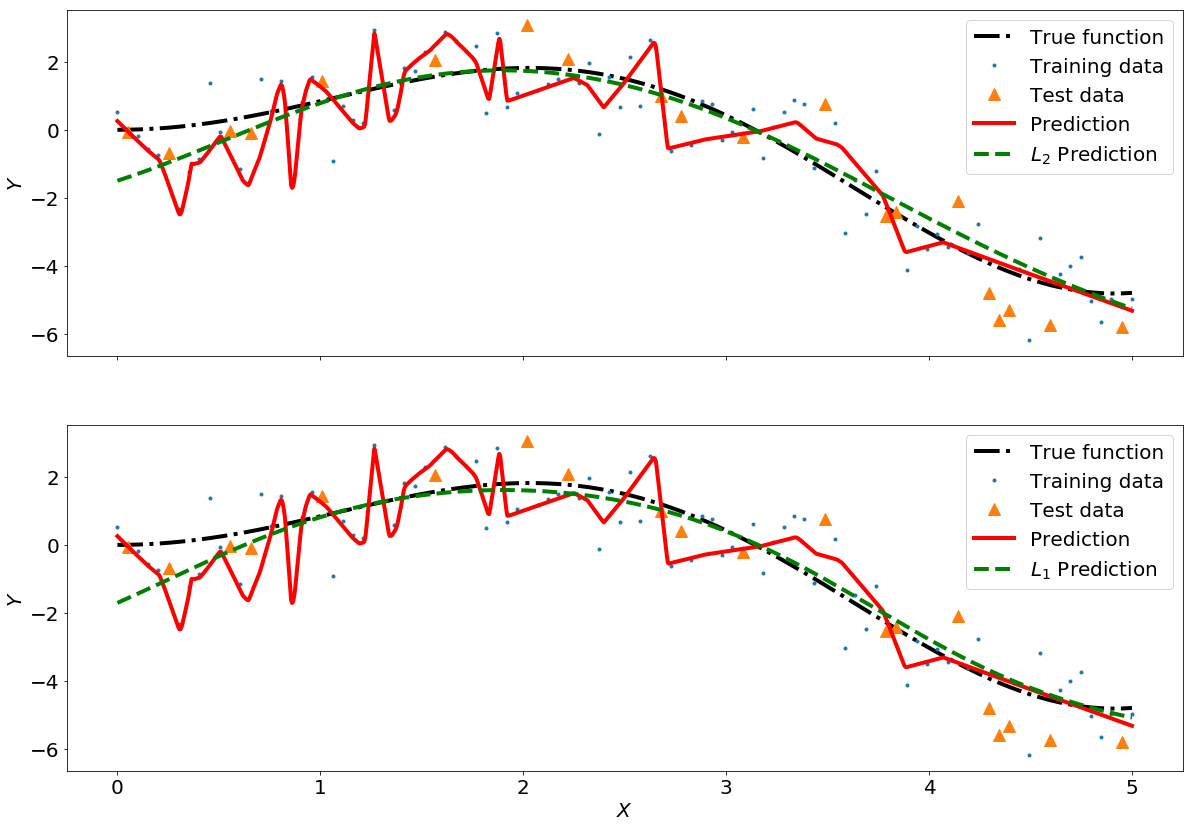

In [11]:
# use our model to predict in the range we want
X_range = np.linspace(0.0, 5, 1000)
y_pred_L2 = model_L2.predict(X_range)

fig, ax = plt.subplots(2, 1, figsize=(20,14), sharex=True)

ax[0].plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax[0].plot(X_train, Y_train, '.', label='Training data')
ax[0].plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax[0].plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax[0].plot(X_range, y_pred_L2, lw=4, ls='--', color='g', label=r'$L_{2}$ Prediction')

ax[0].set_ylabel(r'$Y$', fontsize=20)
ax[0].tick_params(labelsize=20)

ax[0].legend(loc=1, fontsize=20)



y_pred_L1 = model_L1.predict(X_range)

ax[1].plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax[1].plot(X_train, Y_train, '.', label='Training data')
ax[1].plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax[1].plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax[1].plot(X_range, y_pred_L1, lw=4, ls='--', color='g', label=r'$L_{1}$ Prediction')

ax[1].set_xlabel(r'$X$', fontsize=20)
ax[1].set_ylabel(r'$Y$', fontsize=20)
ax[1].tick_params(labelsize=20)

ax[1].legend(loc=1, fontsize=20)

plt.show()

# Early Stopping
The results without any regularization do not look right.  $L_{2}$ and $L_{1}$ regularizaton helped somewhat, but the results still aren't convincing.

We can gain some more insight by plotting the loss functions from the training and validation set.  Let's use a `log-log` scale to enhance any discrepancies between the two curves.

First, a reminder.

Remember that the `fit` method can store the history of the model.  For the unregularized model we stored all the history in the name `no_reg`.  Let's see what attributes are in that object.

In [12]:
dir(no_reg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

There is a lot of stuff; most of it we're not interested in.  However, at the very end of the list, we see some useful keys.  Let's access some of them.

In [13]:
type(no_reg.history)

dict

Looks like `history` is a dictionary.  Let's take a look at it's keys.

In [14]:
no_reg.history.keys()

dict_keys(['val_loss', 'loss'])

Very cool.  There is a `validation` and `training` loss.  

That's the one we'll want to use right now, but we can look at the other attributes too just to get a feel.

In [15]:
type(no_reg.validation_data)

list

In [16]:
type(no_reg.params)

dict

In [17]:
no_reg.params.keys()

dict_keys(['batch_size', 'epochs', 'steps', 'samples', 'verbose', 'do_validation', 'metrics'])

In [18]:
no_reg.params['batch_size']

64

Okay, that was fun and informative.  But what we're really after is the loss data as a function of epoch number.  Here we go.

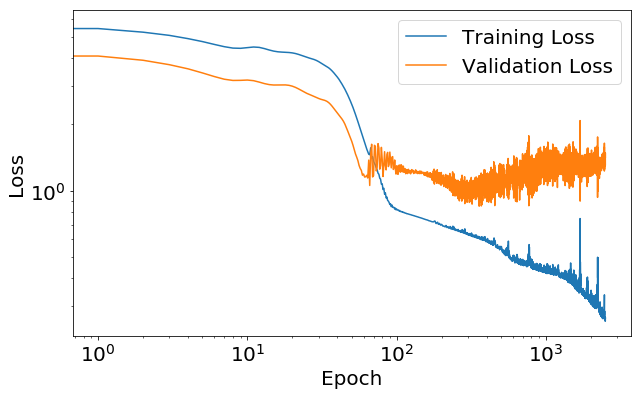

In [19]:
L = no_reg.history['loss']
L_val = no_reg.history['val_loss']

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(L, label='Training Loss')
ax.plot(L_val, label='Validation Loss')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

Wow.  That is striking.

We used $2500$ epochs, but the validation loss begins to rise at around $50$ epochs and becomes larger than the training loss at around $70$ epochs.  After that, we're basically overfitting.

Notice that the training loss keeps decreasing.  We're fitting the training data better and better all the time.  The validation loss is getting larger and larger meaning that we're losing generalizability.

We can use this new information to our advantage!

## Exercise

### Part 1
Train a network without any penalization, but this time stop after $20$ epochs.

### Part 2
Train a network without any penalization, but this time stop at the "optimal" number of epochs (based on the crossing of the loss curves).

**Deliverables**
* Plot the following on a single figure:
  - The true solution
  - The model prediction without any regularization (after $2500$ epochs)
  - The model prediction without any regularization using $20$ epochs
  - The model prediction without any regularization using the optimal number of epochs
* You may also want to include the training and validation data on the same plot.  Be careful that the plot doesn't become too cluttered.

### Solution

#### $20$ epochs

In [20]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

no_reg_20 = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

X_range = np.linspace(0.0, 5, 1000)
y_pred_20 = model.predict(X_range)

Train on 64 samples, validate on 16 samples
Epoch 1/20
64/64 [==============================] - 1s 17ms/step - loss: 5.6850 - val_loss: 4.3010
Epoch 2/20
64/64 [==============================] - 0s 67us/step - loss: 5.4600 - val_loss: 4.1269
Epoch 3/20
64/64 [==============================] - 0s 52us/step - loss: 5.2882 - val_loss: 3.9646
Epoch 4/20
64/64 [==============================] - 0s 54us/step - loss: 5.1296 - val_loss: 3.8229
Epoch 5/20
64/64 [==============================] - 0s 59us/step - loss: 4.9918 - val_loss: 3.6779
Epoch 6/20
64/64 [==============================] - 0s 133us/step - loss: 4.8523 - val_loss: 3.5362
Epoch 7/20
64/64 [==============================] - 0s 126us/step - loss: 4.7199 - val_loss: 3.4053
Epoch 8/20
64/64 [==============================] - 0s 58us/step - loss: 4.6010 - val_loss: 3.2943
Epoch 9/20
64/64 [==============================] - 0s 57us/step - loss: 4.5073 - val_loss: 3.2126
Epoch 10/20
64/64 [==============================] - 0s 64us/st

#### "Optimal" epochs
This probably isn't the optimal value.  But eye-balling the loss curves, I'm guess that $65$ epochs is the best.

In [24]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

no_reg_opt = model.fit(X_train, Y_train, epochs=65, batch_size=64, validation_split=0.2)

y_pred_opt = model.predict(X_range)

Train on 64 samples, validate on 16 samples
Epoch 1/65
64/64 [==============================] - 1s 9ms/step - loss: 5.5357 - val_loss: 4.0898
Epoch 2/65
64/64 [==============================] - 0s 65us/step - loss: 5.2513 - val_loss: 3.8842
Epoch 3/65
64/64 [==============================] - 0s 86us/step - loss: 5.0513 - val_loss: 3.6725
Epoch 4/65
64/64 [==============================] - 0s 57us/step - loss: 4.8482 - val_loss: 3.4794
Epoch 5/65
64/64 [==============================] - 0s 67us/step - loss: 4.6677 - val_loss: 3.3187
Epoch 6/65
64/64 [==============================] - 0s 91us/step - loss: 4.5251 - val_loss: 3.2050
Epoch 7/65
64/64 [==============================] - 0s 57us/step - loss: 4.4375 - val_loss: 3.1540
Epoch 8/65
64/64 [==============================] - 0s 70us/step - loss: 4.4211 - val_loss: 3.1654
Epoch 9/65
64/64 [==============================] - 0s 89us/step - loss: 4.4679 - val_loss: 3.1821
Epoch 10/65
64/64 [==============================] - 0s 122us/step

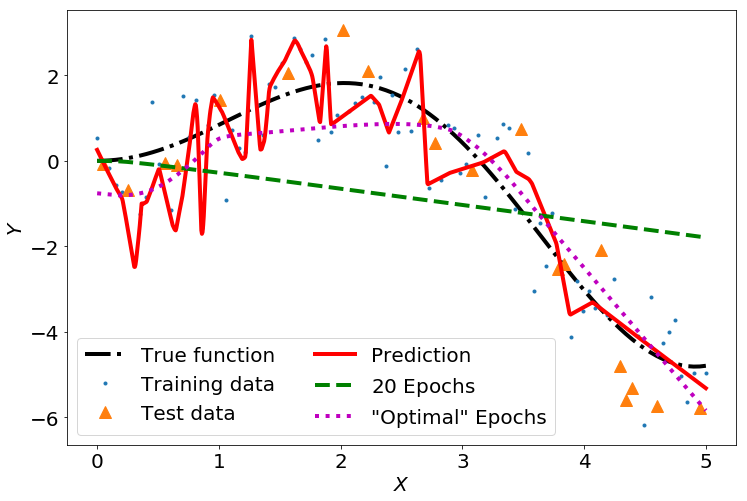

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_20, lw=4, ls='--', color='g', label=r'$20$ Epochs')
ax.plot(X_range, y_pred_opt, lw=4, ls=':', color='m', label=r'"Optimal" Epochs')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()

Let's try to do things more systematically.

How do you think early stopping should be implemented?

To do early stopping in `Keras`, you specify the `EarlyStopping` [*callback*](https://keras.io/callbacks/).  From the documentation:
> A callback is a set of functions to be applied at given stages of the training procedure.

Callbacks can be used to view internal states and statistics of the model during training.

Right now, we'll use one to monitor the validation loss function.  When the validation loss starts to go up, the training process will stop.

#### Basic Syntax
To specify a callback, you just pass a `callbacks` list into the model `fit()` method, like this:
```python
from keras.callbacks import EarlyStopping

model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
```

## Exercise
Fit the model using the early stopping technique.  Try different values for `patience` to see which one gives you the lowest validation loss.

How many epochs are needed?

### Solution

In [31]:
from keras.callbacks import EarlyStopping

num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
no_reg_ES = model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 16ms/step - loss: 5.8866 - val_loss: 4.5283
Epoch 2/2500
64/64 [==============================] - 0s 201us/step - loss: 5.6857 - val_loss: 4.4078
Epoch 3/2500
64/64 [==============================] - 0s 78us/step - loss: 5.5673 - val_loss: 4.3148
Epoch 4/2500
64/64 [==============================] - 0s 53us/step - loss: 5.4747 - val_loss: 4.2364
Epoch 5/2500
64/64 [==============================] - 0s 67us/step - loss: 5.3953 - val_loss: 4.1535
Epoch 6/2500
64/64 [==============================] - 0s 88us/step - loss: 5.3136 - val_loss: 4.0609
Epoch 7/2500
64/64 [==============================] - 0s 50us/step - loss: 5.2227 - val_loss: 3.9631
Epoch 8/2500
64/64 [==============================] - 0s 601us/step - loss: 5.1263 - val_loss: 3.8575
Epoch 9/2500
64/64 [==============================] - 0s 115us/step - loss: 5.0245 - val_loss: 3.7409
Epoch 10/2500
64/64 [=======================

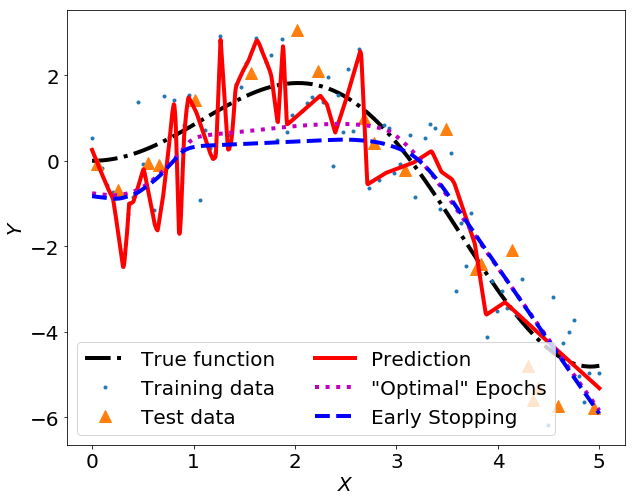

In [34]:
y_pred_ES = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_opt, lw=4, ls=':', color='m', label=r'"Optimal" Epochs')
ax.plot(X_range, y_pred_ES, lw=4, ls='--', color='b', label=r'Early Stopping')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()

The solution should looks pretty good.  Of course, we had to play with the `patience` parameter.

# Dropout
The basic idea behind the dropout technique is to randomly remove (i.e drop) at unit from the network including all of its connections.  Why would we want to do such a thing?  Because we want to avoid overfitting.  An intuitive way of seeing this is that by randomly dropping units at each iteration, we are actually training an ensemble of models.  This ensemble may be more robust to different scenarios than a single model.

One usually needs to figure out how many units to drop in each layer.  Of course, this introduces a new hyperparameter to tune.  However, at least empirically, it appears that choosing a dropout rate of $0.5$ in the hidden layers and $0.8$ in the input layers works well.  Note that here the term "dropout rate" means "the probability of retention of each node in the layer".

Dropout usually works best on large networks.  We will use it on our small lab network today just to understand some of the mechanics.

The original paper on dropout has some nice explanations of the technique and also some really nice practical advice on using the technique:  [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf).

In [ ]:
from keras.constraints import maxnorm

num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
no_reg_dropout = model.fit(X_train, Y_train, epochs=250, batch_size=64, validation_split=0.2)